# Importar librerías y bases de datos

In [ ]:
!pip install kneed

In [ ]:
!pip install gower

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
import gower
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [ ]:
# Cargar los datos
df = pd.read_excel("Datos.xlsx")

## Análisis preliminar

In [ ]:
# Se crea una función que realiza una exploración general a la base de datos
def descripcion(df):
  print("------------------ Descripción general de los datos ------------------")
  print("")
  print("En total la base de datos tiene " + str(len(df)) + " registros y " + str(df.shape[1])+ " variables.")
  print("")
  print("Hay " + str(len(df.select_dtypes(include=['int', 'float']).columns)) + " variables numéricas, las cuales son: " + str(list(df.select_dtypes(include=['int', 'float']).columns)))
  print("")
  print("Hay " + str(len(df.select_dtypes(include=['object']).columns))+ " variables categóricas, las cuales son:" + str(list(df.select_dtypes(include=['object']).columns)))
  print("")
  if df.isnull().any().any():
    print("Algunas columnas tienen valores faltantes. A continuación se muestra el porcentaje de valores nulos por columna:")
    print(df.isnull().sum() / len(df))
  else:
    print("La base de datos no tiene columnas con valores faltantes")

descripcion(df)

------------------ Descripción general de los datos ------------------

En total la base de datos tiene 7662 registros y 35 variables.

Hay 29 variables numéricas, las cuales son: ['AÑO', 'GPSLAT', 'GPSLONG', 'SECTOR', 'SECCION', 'MANZANA', 'DANE5', 'PB1', 'PERSONAS', 'EDAD', 'REDAD', 'GENERO', 'ESTRATO', 'P7', 'P9', 'P27', 'P29', 'P33', 'P34', 'P56', 'P57', 'P64', 'NIVEL_PIRAMIDE', 'POBLACION_5_16', 'Estudiantes_5_16', 'PROP_EDUC_5_16_MEN', 'HOGARES_INTERNET', 'POBLACIÓN_ICFES', 'TASA_INTERNET_ICFES']

Hay 6 variables categóricas, las cuales son:['DIRECCION_FILTRO', 'P10', 'P15', 'MUNICIPIO_NOMBRE', 'Nombre Municipio', 'Nombre Departamento']

Algunas columnas tienen valores faltantes. A continuación se muestra el porcentaje de valores nulos por columna:
AÑO                    0.000000
GPSLAT                 0.135996
GPSLONG                0.135996
SECTOR                 0.000000
SECCION                0.000000
MANZANA                0.000000
DIRECCION_FILTRO       0.000000
DANE5      

In [ ]:
df = df.rename(columns={
    "PB1": "AREA",
    "P7": "SERVICIOS_PERSONA",
    "P9": "SERVICIOS_HOGAR",
    "P10": "ACTIVIDAD_INTERNET",
    "P15": "EQUIPOS",
    "P27": "TIPO_CONEXION",
    "P29": "VELOCIDAD_INTERNET",
    "P33": "FRECUENCIA_INTERNET",
    "P34": "RECENCIA_INTERNET",
    "P56": "RECENCIA_COMPRA",
    "P57": "FRECUENCIA_COMPRA",
    "P64": "RECENCIA_VENTA_INTERNET"
})

In [ ]:
# Crear la variable CANTIDAD_EQUIPOS
df["CANTIDAD_EQUIPOS"] = df["EQUIPOS"].astype(str).str.len() // 2

In [ ]:
df.describe()

AÑO       GPSLAT      GPSLONG        SECTOR      SECCION  \
count  7662.000000  6620.000000  6620.000000   7662.000000  7662.000000   
mean   2020.727095     6.140382     7.558627   1993.167189    12.033803   
std       2.489827     3.417394    74.597830   3216.746402    33.062799   
min    2018.000000   -77.277221   -77.297173      0.000000     0.000000   
25%    2018.000000     4.432272   -74.826292     13.000000     2.000000   
50%    2023.000000     5.675870    73.115492    705.000000     3.000000   
75%    2023.000000     7.909766    75.484364   2105.000000     6.000000   
max    2023.000000    11.269477    78.782745  99999.000000   999.000000   

           MANZANA         DANE5         AREA     PERSONAS         EDAD  ...  \
count  7662.000000   7662.000000  7662.000000  7662.000000  7662.000000  ...   
mean     19.517750  36881.520230     1.111720     3.521926    40.037588  ...   
std     117.912282  27746.655225     0.315042     1.746042    18.351039  ...   
min       0.000000   5001.000000     1.000000     1.000000    12.000000  ...   
25%       4.000000   8758.000000     1.000000     2.000000    24.000000  ...   
50%       9.000000  25843.000000     1.000000     3.000000    38.000000  ...   
75%      17.000000  66001.000000     1.000000     4.000000    56.000000  ...   
max    9904.000000  86001.000000     2.000000    15.000000    79.000000  ...   

       FRECUENCIA_COMPRA  RECENCIA_VENTA_INTERNET  NIVEL_PIRAMIDE  \
count         538.000000              6804.000000     7662.000000   
mean            3.814126                 8.059083        1.186635   
std             1.465565                 2.057895        0.948560   
min             1.000000                 1.000000        0.000000   
25%             2.000000                 9.000000        0.000000   
50%             5.000000                 9.000000        1.000000   
75%             5.000000                 9.000000        2.000000   
max             5.000000                 9.000000        3.000000   

       POBLACION_5_16  Estudiantes_5_16  PROP_EDUC_5_16_MEN  HOGARES_INTERNET  \
count    7.662000e+03      7.662000e+03         7662.000000       7662.000000   
mean     2.595890e+05      2.444573e+05            0.948225      14835.851475   
std      3.389681e+05      3.179087e+05            0.100197      22211.532355   
min      1.089000e+03      1.337000e+03            0.650993         13.000000   
25%      4.070400e+04      3.604300e+04            0.911592       1610.000000   
50%      1.037480e+05      9.724100e+04            0.965100       5572.000000   
75%      3.775620e+05      3.082360e+05            1.010098      17680.000000   
max      1.179282e+06      1.138125e+06            1.276400      79258.000000   

       POBLACIÓN_ICFES  TASA_INTERNET_ICFES  CANTIDAD_EQUIPOS  
count      7662.000000          7662.000000       7662.000000  
mean      17478.427173             0.732950          2.238319  
std       24521.054932             0.169146          1.711728  
min          53.000000             0.058036          1.000000  
25%        1895.000000             0.660317          1.000000  
50%        6995.000000             0.770508          2.000000  
75%       19903.000000             0.876215          3.000000  
max       90455.000000             0.967623         12.000000  

[8 rows x 30 columns]

In [ ]:
# Crer variables de servicios_persona

# Diccionario de servicios
servicios = {
    "Celular": "1",
    "Internet_fijo": "2",
    "Internet_cel_tab": "3",
    "Internet_movil": "4",
    "Ninguno":  ["9", "88"]
}

# Crear columnas
for nombre, codigo in servicios.items():
    if isinstance(codigo, list):  # Si es lista (ej. "Ninguno")
        df[nombre] = df["SERVICIOS_PERSONA"].apply(
            lambda x: np.nan if pd.isna(x) else (1 if any(str(c) in str(int(x)) for c in codigo) else 0)
        )
    else:
        df[nombre] = df["SERVICIOS_PERSONA"].apply(
            lambda x: np.nan if pd.isna(x) else (1 if str(codigo) in str(int(x)) else 0)
        )

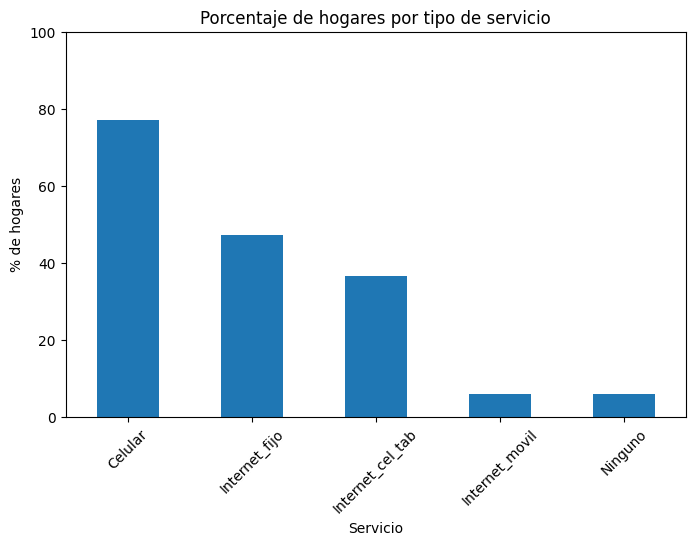

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar solo las columnas de interés
cols = ["Celular", "Internet_fijo", "Internet_cel_tab", "Internet_movil", "Ninguno"]

# Calcular el % de hogares que tienen cada servicio
porcentajes = df[cols].mean(skipna=True) * 100   # mean() da la proporción de 1s, multiplicamos por 100

# Crear gráfico
plt.figure(figsize=(8,5))
porcentajes.plot(kind="bar")

plt.title("Porcentaje de hogares por tipo de servicio")
plt.ylabel("% de hogares")
plt.xlabel("Servicio")
plt.xticks(rotation=45)
plt.ylim(0,100)

plt.show()

In [ ]:
# Diccionario de mapeo
rango_map = {
    1: "12-17",
    2: "18-24",
    3: "25-34",
    4: "35-44",
    5: "45-54",
    6: "55-64",
    7: "65-75"
}

# Crear nueva columna
df["Rango_edad"] = df["REDAD"].map(rango_map)

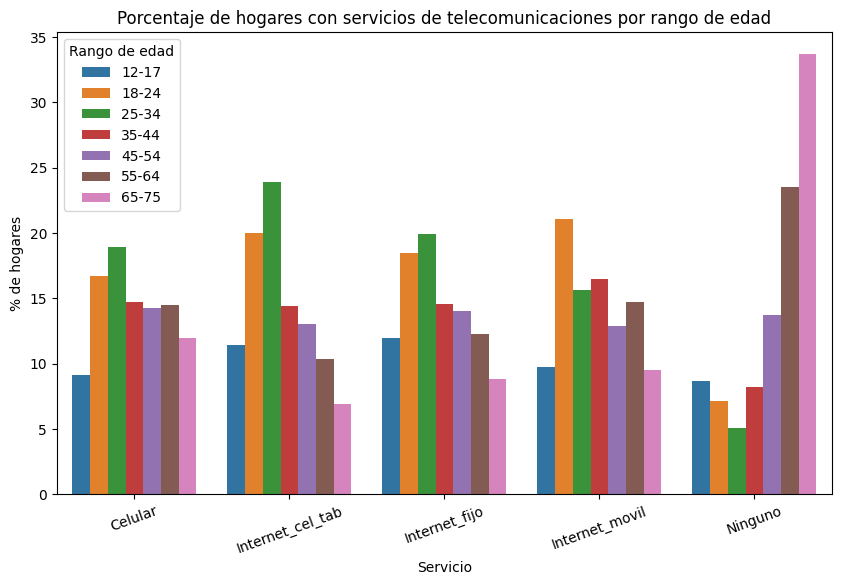

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Columnas de servicios
servicios_cols = ["Celular", "Internet_fijo", "Internet_cel_tab", "Internet_movil", "Ninguno"]

# Pasar a formato largo
df_long = df.melt(
    id_vars="Rango_edad",
    value_vars=servicios_cols,
    var_name="Servicio",
    value_name="Tiene"
)

# Filtrar solo los que sí tienen el servicio
df_long = df_long[df_long["Tiene"] == 1]

# Calcular porcentaje por grupo (Rango_edad, Servicio)
conteos = df_long.groupby(["Rango_edad", "Servicio"]).size().reset_index(name="n")

# Calcular totales por Servicio
totales = conteos.groupby("Servicio")["n"].transform("sum")

# Agregar columna de porcentaje
conteos["Porcentaje"] = 100 * conteos["n"] / totales

# --- Gráfico de barras agrupadas ---
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(data=conteos, x="Servicio", y="Porcentaje", hue="Rango_edad")

plt.title("Porcentaje de hogares con servicios de telecomunicaciones por rango de edad")
plt.ylabel("% de hogares")
plt.xlabel("Servicio")
plt.legend(title="Rango de edad")
plt.xticks(rotation=20)
plt.show()

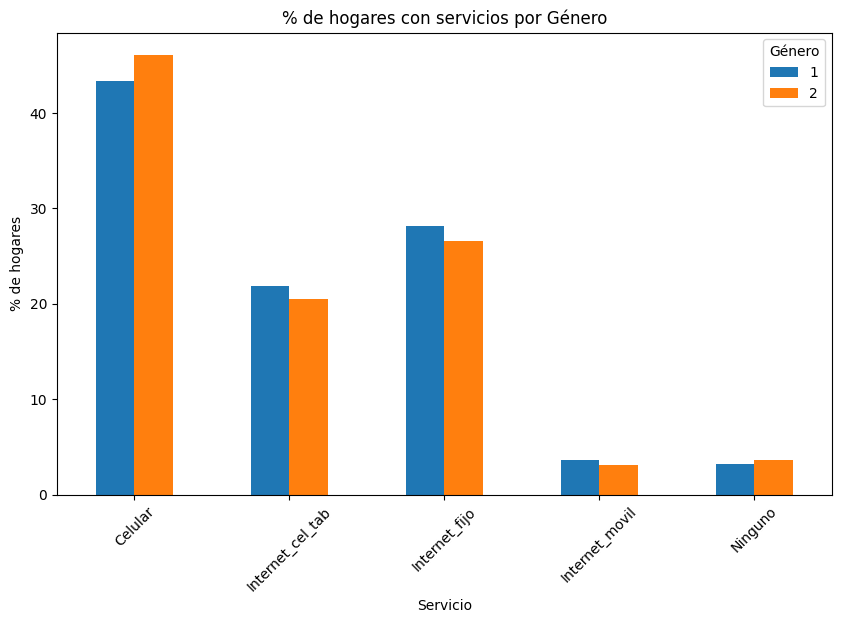

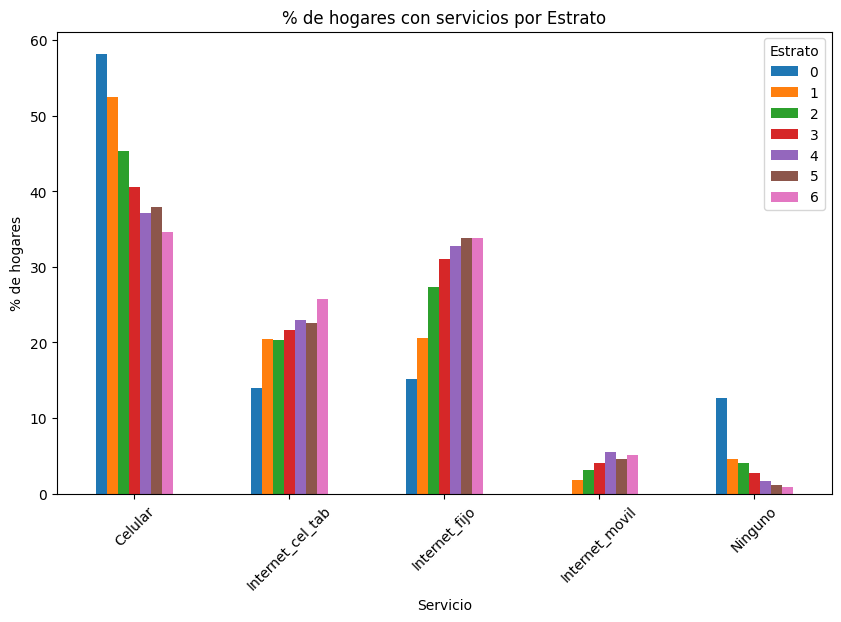

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Columnas de servicios
servicios_cols = ["Celular", "Internet_fijo", "Internet_cel_tab", "Internet_movil", "Ninguno"]

# ==========================
# Gráfico por GENERO
# ==========================
df_genero = (
    df[["GENERO"] + servicios_cols]
    .melt(id_vars="GENERO", var_name="Servicio", value_name="Tiene")
    .query("Tiene == 1")
    .groupby(["GENERO", "Servicio"])
    .size()
    .reset_index(name="Conteo")
)

# Calcular % dentro de cada GENERO
df_genero["Porcentaje"] = df_genero.groupby("GENERO")["Conteo"].transform(lambda x: 100 * x / x.sum())

# Pivot para gráfico de barras agrupadas
df_genero_pivot = df_genero.pivot(index="Servicio", columns="GENERO", values="Porcentaje")

df_genero_pivot.plot(kind="bar", figsize=(10,6))
plt.title("% de hogares con servicios por Género")
plt.ylabel("% de hogares")
plt.legend(title="Género")
plt.xticks(rotation=45)
plt.show()


# ==========================
# Gráfico por ESTRATO
# ==========================
df_estrato = (
    df[["ESTRATO"] + servicios_cols]
    .melt(id_vars="ESTRATO", var_name="Servicio", value_name="Tiene")
    .query("Tiene == 1")
    .groupby(["ESTRATO", "Servicio"])
    .size()
    .reset_index(name="Conteo")
)

# Calcular % dentro de cada ESTRATO
df_estrato["Porcentaje"] = df_estrato.groupby("ESTRATO")["Conteo"].transform(lambda x: 100 * x / x.sum())

# Pivot para gráfico de barras agrupadas
df_estrato_pivot = df_estrato.pivot(index="Servicio", columns="ESTRATO", values="Porcentaje")

df_estrato_pivot.plot(kind="bar", figsize=(10,6))
plt.title("% de hogares con servicios por Estrato")
plt.ylabel("% de hogares")
plt.legend(title="Estrato")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Diccionario de equivalencias
map_piramide = {
    0: "Nivel No Usuario",
    1: "Básico",
    2: "Intermedio",
    3: "Avanzado"
}

# Crear nueva columna
df["NIVEL_PIRAMIDE_LABEL"] = df["NIVEL_PIRAMIDE"].map(map_piramide)

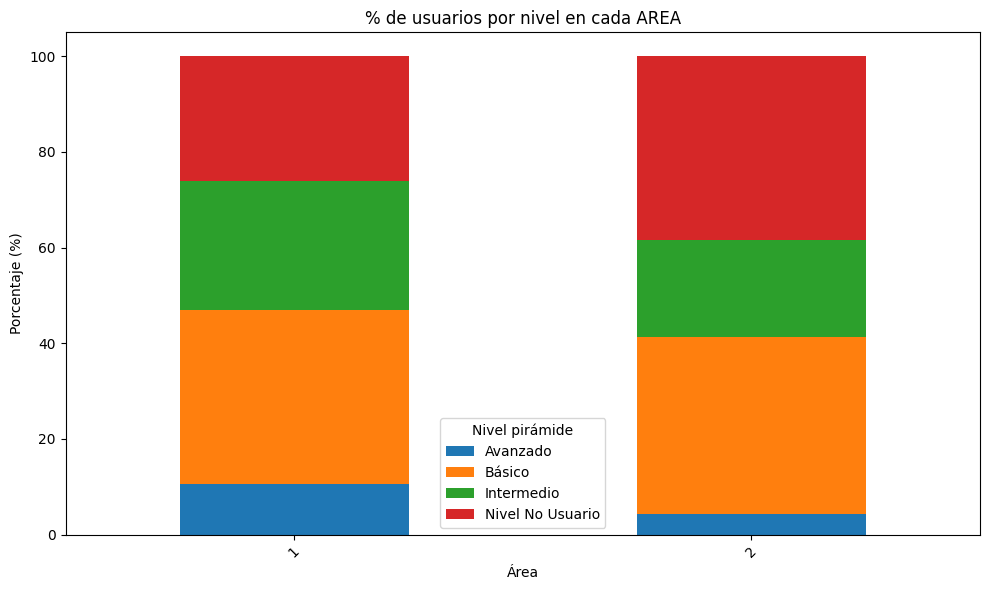

In [ ]:
import matplotlib.pyplot as plt

# --- Calcular porcentajes por AREA y NIVEL ---
porcentajes_area = (
    df.groupby(["AREA", "NIVEL_PIRAMIDE_LABEL"], as_index=False)
      .size()
      .rename(columns={"size": "Conteo"})
)

porcentajes_area["Porcentaje"] = (
    porcentajes_area.groupby("AREA")["Conteo"].transform(lambda x: 100 * x / x.sum())
)

# --- Pivotear para graficar ---
pivot_area = porcentajes_area.pivot(
    index="AREA",
    columns="NIVEL_PIRAMIDE_LABEL",
    values="Porcentaje"
).fillna(0)

# --- Gráfico apilado ---
pivot_area.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("% de usuarios por nivel en cada AREA")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Área")
plt.legend(title="Nivel pirámide")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

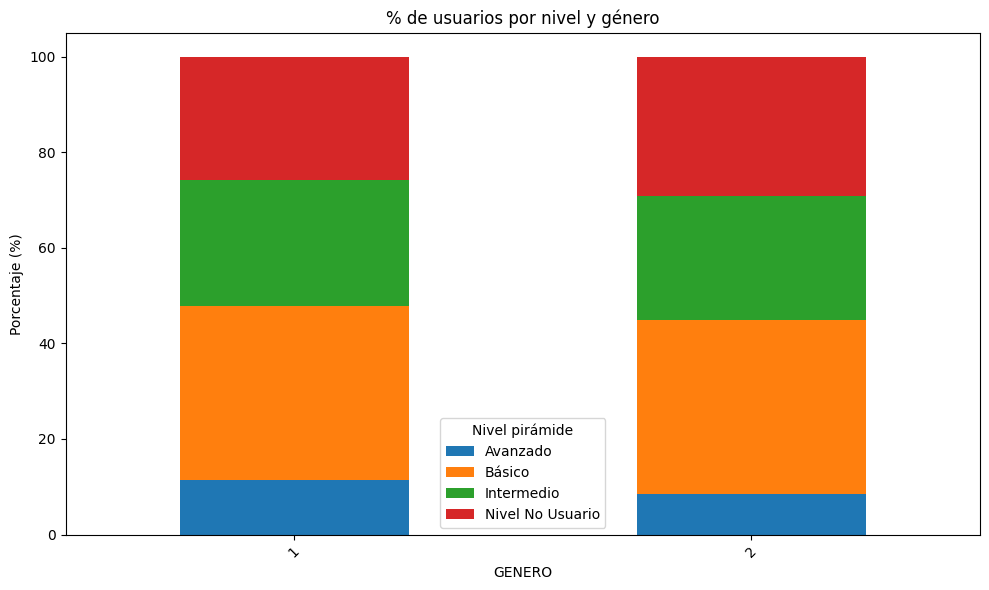

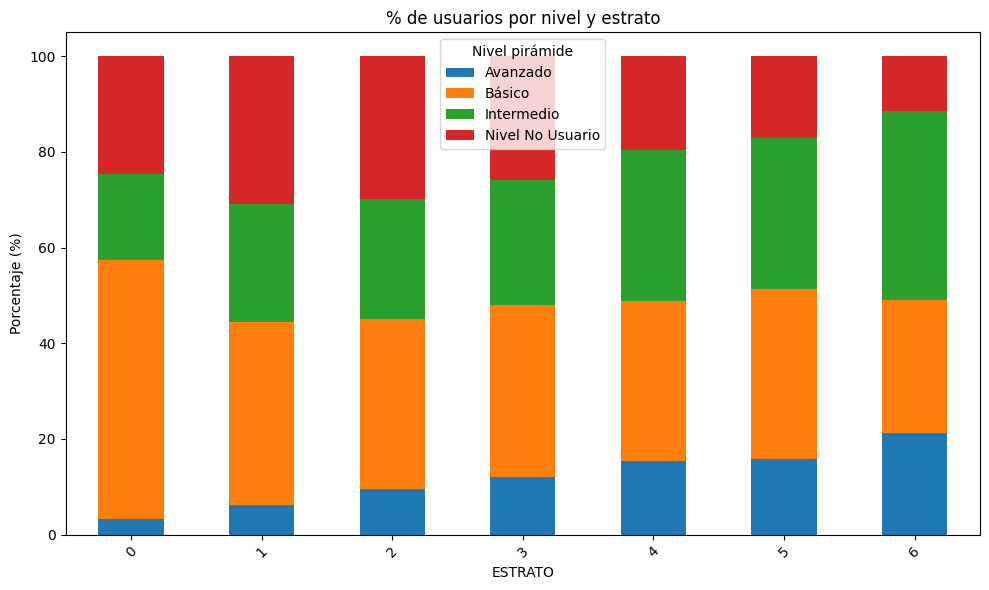

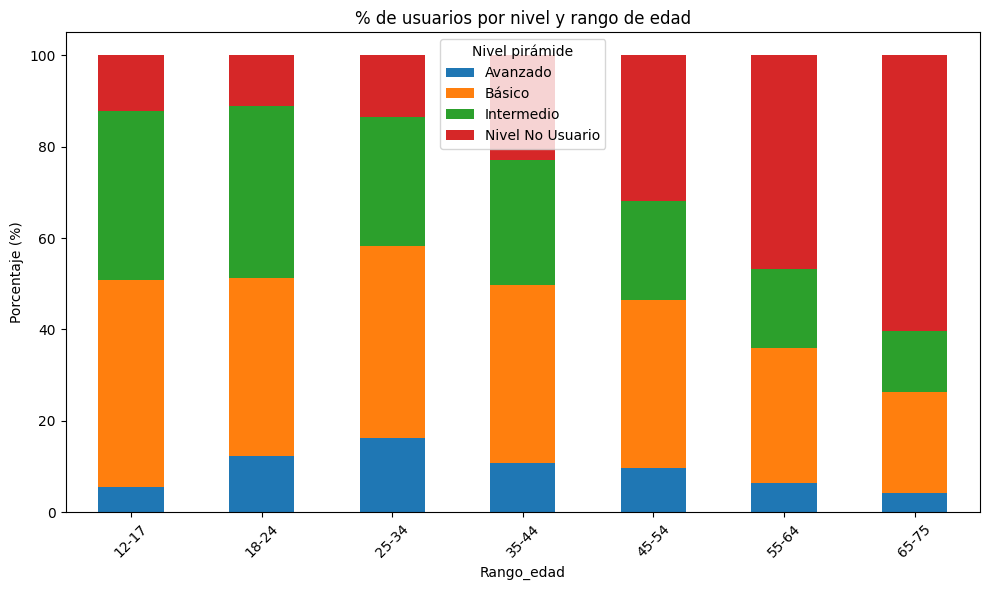

In [ ]:
import matplotlib.pyplot as plt

def grafico_por_variable(df, variable, titulo):
    # --- Calcular % por variable y nivel ---
    porcentajes = (
        df.groupby([variable, "NIVEL_PIRAMIDE_LABEL"], as_index=False)
          .size()
          .rename(columns={"size": "Conteo"})
    )

    porcentajes["Porcentaje"] = (
        porcentajes.groupby(variable)["Conteo"].transform(lambda x: 100 * x / x.sum())
    )

    # --- Pivotear para graficar ---
    pivot = porcentajes.pivot(
        index=variable,
        columns="NIVEL_PIRAMIDE_LABEL",
        values="Porcentaje"
    ).fillna(0)

    # --- Gráfico apilado ---
    pivot.plot(kind="bar", stacked=True, figsize=(10,6))
    plt.title(titulo)
    plt.ylabel("Porcentaje (%)")
    plt.xlabel(variable)
    plt.legend(title="Nivel pirámide")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --- Llamadas ---
grafico_por_variable(df, "GENERO", "% de usuarios por nivel y género")
grafico_por_variable(df, "ESTRATO", "% de usuarios por nivel y estrato")
grafico_por_variable(df, "Rango_edad", "% de usuarios por nivel y rango de edad")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AÑO                      7662 non-null   int64  
 1   GPSLAT                   6620 non-null   float64
 2   GPSLONG                  6620 non-null   float64
 3   SECTOR                   7662 non-null   int64  
 4   SECCION                  7662 non-null   int64  
 5   MANZANA                  7662 non-null   int64  
 6   DIRECCION_FILTRO         7662 non-null   object 
 7   DANE5                    7662 non-null   int64  
 8   AREA                     7662 non-null   int64  
 9   PERSONAS                 7662 non-null   int64  
 10  EDAD                     7662 non-null   int64  
 11  REDAD                    7662 non-null   int64  
 12  GENERO                   7662 non-null   int64  
 13  ESTRATO                  7662 non-null   int64  
 14  SERVICIOS_PERSONA       

## DBSCAN

**Primer grupo de variables**: Edad, Género, Estrato, Servicios_persona, Frecuencia_internet

**Segundo grupo de variables**: Edad, Género, Estrato, Servicios_persona, Nivel_piramide, Cantidad equipos, Velocidad internte, Frecuencia_internet

**Tecer grupo de variables**: Edad, Género, Estrato, Servicios_persona, Nivel_piramide, Cantidad equipos, Velocidad internte, Frecuencia_internet, Recencia compra, Recencia venta, Area

### Verificación de supuestos

### Experimento 1

#### Implementación

In [ ]:
df_1 = df[['GENERO','ESTRATO','EDAD', 'FRECUENCIA_INTERNET',
                 "Celular", "Internet_fijo", "Internet_cel_tab",
                 "Internet_movil", "Ninguno"]].dropna()

In [ ]:
df_1['GENERO'] = df_1['GENERO'].replace({1: 'MASCULINO', 2: 'FEMENINO'})

In [ ]:
# ------------------------------
# Calcular matriz de distancia de Gower
# ------------------------------
D = gower.gower_matrix(df_1)

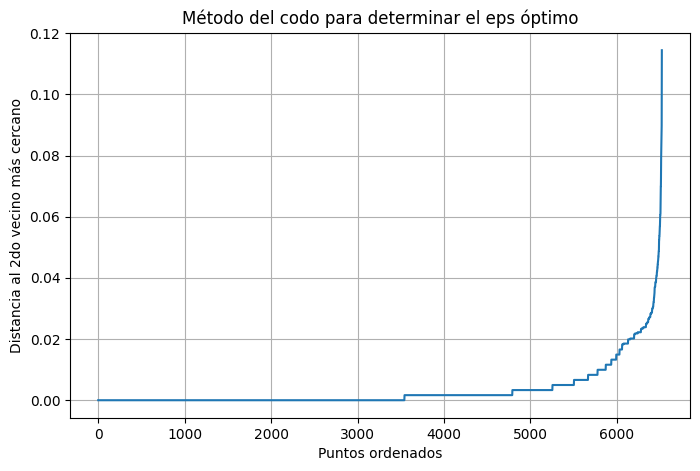

El valor óptimo de eps es: 0.05693753436207771


In [ ]:
## Elección eps
# Usar NearestNeighbors para encontrar las distancias al 2do vecino más cercano
neighbors = NearestNeighbors(n_neighbors=2, metric='precomputed')
neighbors_fit = neighbors.fit(D)
distances, indices = neighbors_fit.kneighbors(D)

# Ordenar las distancias al segundo vecino (excluyendo la distancia a sí mismo)
distances = np.sort(distances[:, 1])

# Graficar las distancias ordenadas
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 2do vecino más cercano')
plt.title('Método del codo para determinar el eps óptimo')
plt.grid(True)
plt.show()

# Usar KneeLocator para encontrar el punto de rodilla
kl = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")

# Obtener el valor óptimo de eps
eps_optimo = distances[kl.elbow]
print(f"El valor óptimo de eps es: {eps_optimo}")

In [ ]:
# Elección min_samples
# Como tenemos más de 2 dimensiones usaremos el criterio de Sander et al., (1998) quienes sugieren utilizar al menos min_samples= 2*dim.

# Definir y ajustar el modelo DBSCAN con el eps óptimo
dbscan_1 = DBSCAN(eps=eps_optimo, min_samples=18, metric='precomputed')
dbscan_1.fit(D)

# Añadir los clusters de DBSCAN a los datos originales
df_1['Cluster1'] = dbscan_1.labels_

Cantidad de registros por cluster:
Cluster1
 7     783
 2     719
 12    694
 8     655
 16    590
 3     521
 5     389
 6     337
 0     286
 10    259
 9     205
 4     203
-1     159
 17    153
 1     134
 14    110
 13     93
 19     44
 20     36
 18     34
 11     31
 15     26
 21     25
 22     18
 23     18
Name: count, dtype: int64


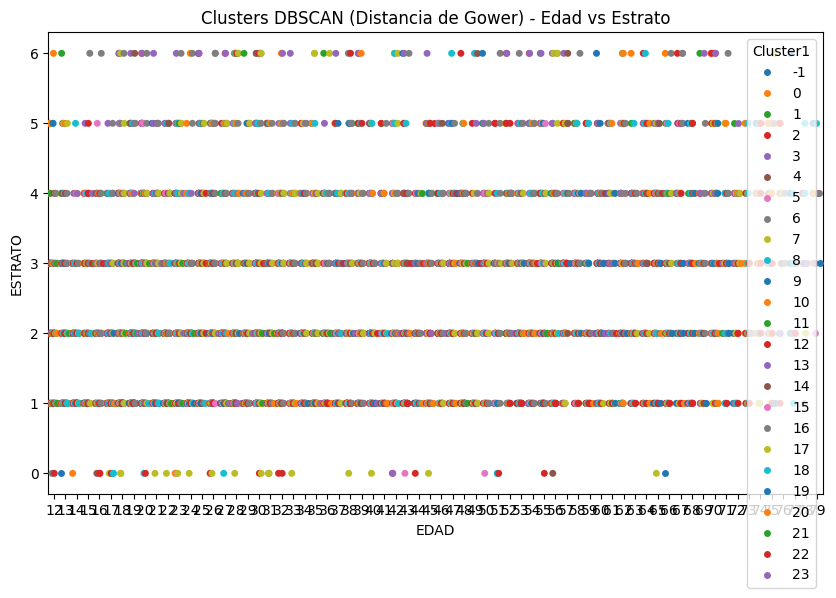

In [ ]:
# ------------------------------
# Resumen de clusters encontrados
# ------------------------------
print("Cantidad de registros por cluster:")
print(df_1['Cluster1'].value_counts())

# ------------------------------
# Visualización simple (ejemplo con EDAD vs Estrato)
# ------------------------------
plt.figure(figsize=(10, 6))
sns.stripplot(x=df_1['EDAD'], y=df_1['ESTRATO'],
              hue=df_1['Cluster1'], dodge=True, palette="tab10")
plt.title("Clusters DBSCAN (Distancia de Gower) - Edad vs Estrato")
plt.show()

#### Validación

In [ ]:
# Asegurar que 'Cluster1' esté en formato entero
df_1['Cluster1'] = df_1['Cluster1'].astype(int)

# Preparar las variables para la distancia de Gower (excluyendo la columna 'Cluster1')
X = df_1.drop(columns=['Cluster1'])

# Calcular la matriz de distancias de Gower
gower_dist_matrix = gower.gower_matrix(X)

# Calcular el índice de Silhouette usando la matriz de distancias de Gower
silhouette_avg = silhouette_score(gower_dist_matrix, df_1['Cluster1'], metric='precomputed')

print(f"Índice de Silhouette con distancia de Gower: {silhouette_avg:.3f}")

Índice de Silhouette con distancia de Gower: 0.536


### Experimento 2

#### Implementación

Segundo grupo de variables: Edad, Género, Estrato, Servicios_persona, Nivel_piramide, Cantidad equipos, Velocidad internte, Frecuencia_internet

In [ ]:
df_2 = df[['GENERO','ESTRATO','EDAD', 'FRECUENCIA_INTERNET', 'NIVEL_PIRAMIDE', 'CANTIDAD_EQUIPOS', 'VELOCIDAD_INTERNET']].dropna()

In [ ]:
df_2

GENERO  ESTRATO  EDAD  FRECUENCIA_INTERNET  NIVEL_PIRAMIDE  \
3          1        2    38                  1.0               1   
4          1        2    43                  2.0               2   
5          2        3    66                  1.0               1   
8          2        2    14                  1.0               2   
9          1        2    28                  1.0               3   
...      ...      ...   ...                  ...             ...   
7657       1        4    69                  1.0               2   
7658       1        2    24                  1.0               1   
7659       1        2    47                  1.0               3   
7660       2        2    58                  4.0               1   
7661       2        2    34                  1.0               3   

      CANTIDAD_EQUIPOS  VELOCIDAD_INTERNET  
3                    1                 2.0  
4                    3                 1.0  
5                    1                 1.0  
8                    1                 1.0  
9                    2                 2.0  
...                ...                 ...  
7657                 2                 1.0  
7658                 4                 1.0  
7659                 2                 2.0  
7660                 2                 1.0  
7661                 2                 2.0  

[4652 rows x 7 columns]

In [ ]:
df_2['GENERO'] = df_2['GENERO'].replace({1: 'MASCULINO', 2: 'FEMENINO'})
df_2['NIVEL_PIRAMIDE'] = df_2['NIVEL_PIRAMIDE'].replace({0: "NO USUARIO", 1: "BASICO", 2: "INTERMEDIO",   3: "AVANZADO"})
df_2['VELOCIDAD_INTERNET'] = df_2['VELOCIDAD_INTERNET'].replace({1: "SI", 2: "NO"})

In [ ]:
# ------------------------------
# Calcular matriz de distancia de Gower
# ------------------------------
D_2 = gower.gower_matrix(df_2)

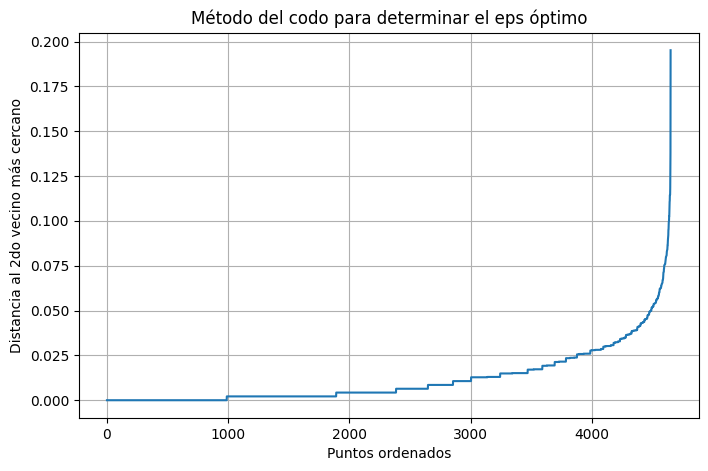

El valor óptimo de eps es: 0.07761193811893463


In [ ]:
## Elección eps
# Usar NearestNeighbors para encontrar las distancias al 2do vecino más cercano
neighbors_2 = NearestNeighbors(n_neighbors=2, metric='precomputed')
neighbors_fit_2 = neighbors_2.fit(D_2)
distances_2, indices_2 = neighbors_fit_2.kneighbors(D_2)

# Ordenar las distancias al segundo vecino (excluyendo la distancia a sí mismo)
distances_2 = np.sort(distances_2[:, 1])

# Graficar las distancias ordenadas
plt.figure(figsize=(8, 5))
plt.plot(distances_2)
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 2do vecino más cercano')
plt.title('Método del codo para determinar el eps óptimo')
plt.grid(True)
plt.show()

# Usar KneeLocator para encontrar el punto de rodilla
kl_2 = KneeLocator(range(len(distances_2)), distances_2, curve="convex", direction="increasing")

# Obtener el valor óptimo de eps
eps_optimo_2 = distances_2[kl_2.elbow]
print(f"El valor óptimo de eps es: {eps_optimo_2}")

In [ ]:
# Elección min_samples
# Como tenemos más de 2 dimensiones usaremos el criterio de Sander et al., (1998) quienes sugieren utilizar al menos min_samples= 2*dim.

# Definir y ajustar el modelo DBSCAN con el eps óptimo
dbscan_2 = DBSCAN(eps=eps_optimo_2, min_samples=14, metric='precomputed')
dbscan_2.fit(D_2)

# Añadir los clusters de DBSCAN a los datos originales
df_2['Cluster2'] = dbscan_2.labels_

Cantidad de registros por cluster:
Cluster2
 6     715
 2     677
 1     575
 3     553
 14    256
 5     224
 9     205
 8     190
 10    185
 0     170
 11    158
-1     151
 12    145
 4      86
 7      82
 20     63
 17     51
 18     41
 13     40
 19     35
 15     33
 16     17
Name: count, dtype: int64


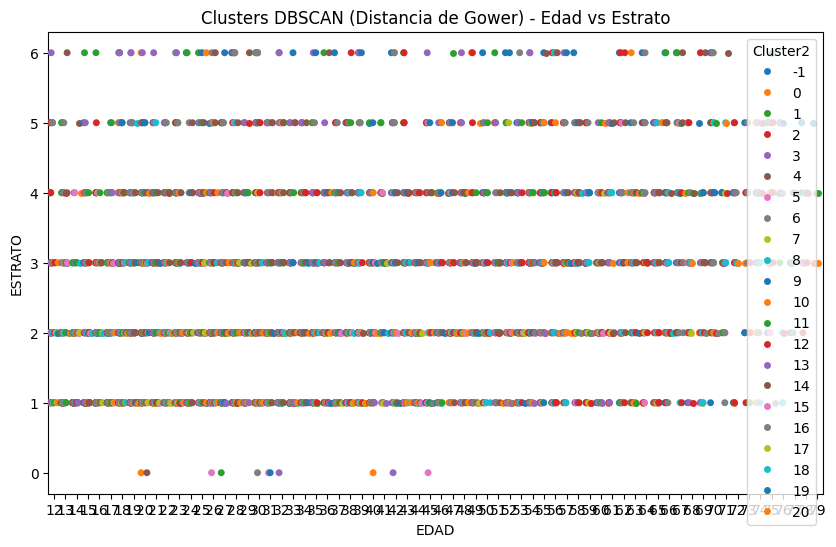

In [ ]:
# ------------------------------
# Resumen de clusters encontrados
# ------------------------------
print("Cantidad de registros por cluster:")
print(df_2['Cluster2'].value_counts())

# ------------------------------
# Visualización simple (ejemplo con EDAD vs Estrato)
# ------------------------------
plt.figure(figsize=(10, 6))
sns.stripplot(x=df_2['EDAD'], y=df_2['ESTRATO'],
              hue=df_2['Cluster2'], dodge=True, palette="tab10")
plt.title("Clusters DBSCAN (Distancia de Gower) - Edad vs Estrato")
plt.show()

#### Validación

In [ ]:
# Asegurar que 'Cluster' esté en formato entero
df_2['Cluster2'] = df_2['Cluster2'].astype(int)

# Preparar las variables para la distancia de Gower (excluyendo la columna 'Cluster')
X_2 = df_2.drop(columns=['Cluster2'])

# Calcular la matriz de distancias de Gower
gower_dist_matrix_2 = gower.gower_matrix(X_2)

# Calcular el índice de Silhouette usando la matriz de distancias de Gower
silhouette_avg_2 = silhouette_score(gower_dist_matrix_2, df_2['Cluster2'], metric='precomputed')

print(f"Índice de Silhouette con distancia de Gower: {silhouette_avg_2:.3f}")

Índice de Silhouette con distancia de Gower: 0.492


### Experimento 3

In [ ]:
df_3 = df[['GENERO','ESTRATO','EDAD', 'FRECUENCIA_INTERNET', 'NIVEL_PIRAMIDE', 'CANTIDAD_EQUIPOS', 'VELOCIDAD_INTERNET']].dropna()

In [ ]:
df_3

GENERO  ESTRATO  EDAD  FRECUENCIA_INTERNET  NIVEL_PIRAMIDE  \
3          1        2    38                  1.0               1   
4          1        2    43                  2.0               2   
5          2        3    66                  1.0               1   
8          2        2    14                  1.0               2   
9          1        2    28                  1.0               3   
...      ...      ...   ...                  ...             ...   
7657       1        4    69                  1.0               2   
7658       1        2    24                  1.0               1   
7659       1        2    47                  1.0               3   
7660       2        2    58                  4.0               1   
7661       2        2    34                  1.0               3   

      CANTIDAD_EQUIPOS  VELOCIDAD_INTERNET  
3                    1                 2.0  
4                    3                 1.0  
5                    1                 1.0  
8                    1                 1.0  
9                    2                 2.0  
...                ...                 ...  
7657                 2                 1.0  
7658                 4                 1.0  
7659                 2                 2.0  
7660                 2                 1.0  
7661                 2                 2.0  

[4652 rows x 7 columns]

In [ ]:
df_3['GENERO'] = df_3['GENERO'].replace({1: 'MASCULINO', 2: 'FEMENINO'})
df_3['NIVEL_PIRAMIDE'] = df_3['NIVEL_PIRAMIDE'].replace({0: "NO USUARIO", 1: "BASICO", 2: "INTERMEDIO",   3: "AVANZADO"})
df_3['VELOCIDAD_INTERNET'] = df_3['VELOCIDAD_INTERNET'].replace({1: "SI", 2: "NO"})

In [ ]:
# ------------------------------
# Calcular matriz de distancia de Gower
# ------------------------------
D_3 = gower.gower_matrix(df_3)

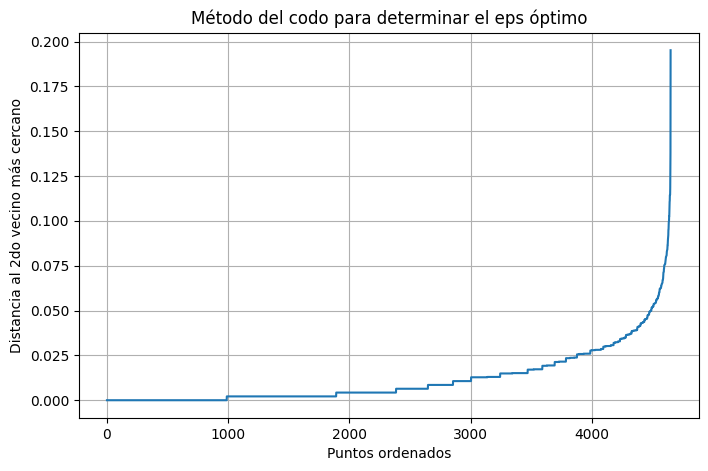

El valor óptimo de eps es: 0.07761193811893463


In [ ]:
## Elección eps
# Usar NearestNeighbors para encontrar las distancias al 2do vecino más cercano
neighbors_3 = NearestNeighbors(n_neighbors=2, metric='precomputed')
neighbors_fit_3 = neighbors_3.fit(D_3)
distances_3, indices_3 = neighbors_fit_3.kneighbors(D_3)

# Ordenar las distancias al segundo vecino (excluyendo la distancia a sí mismo)
distances_3 = np.sort(distances_3[:, 1])

# Graficar las distancias ordenadas
plt.figure(figsize=(8, 5))
plt.plot(distances_3)
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 2do vecino más cercano')
plt.title('Método del codo para determinar el eps óptimo')
plt.grid(True)
plt.show()

# Usar KneeLocator para encontrar el punto de rodilla
kl_3 = KneeLocator(range(len(distances_3)), distances_3, curve="convex", direction="increasing")

# Obtener el valor óptimo de eps
eps_optimo_3 = distances_3[kl_3.elbow]
print(f"El valor óptimo de eps es: {eps_optimo_3}")

In [ ]:
# Elección min_samples
# Como tenemos más de 2 dimensiones usaremos el criterio de Sander et al., (1998) quienes sugieren utilizar al menos min_samples= 2*dim.

# Definir y ajustar el modelo DBSCAN con el eps óptimo
dbscan_3 = DBSCAN(eps=eps_optimo_3, min_samples=21, metric='precomputed')
dbscan_3.fit(D_3)

# Añadir los clusters de DBSCAN a los datos originales
df_3['Cluster3'] = dbscan_3.labels_

Cantidad de registros por cluster:
Cluster3
 6     711
 2     674
 1     575
 3     552
-1     276
 13    255
 5     223
 9     205
 8     190
 10    184
 0     164
 11    152
 12    138
 4      86
 18     59
 7      53
 15     48
 17     41
 14     38
 16     28
Name: count, dtype: int64


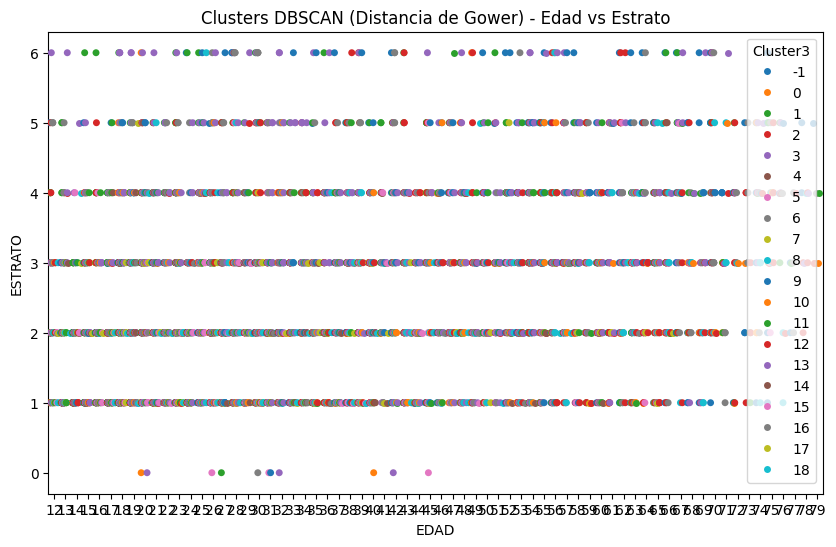

In [ ]:
# ------------------------------
# Resumen de clusters encontrados
# ------------------------------
print("Cantidad de registros por cluster:")
print(df_3['Cluster3'].value_counts())

# ------------------------------
# Visualización simple (ejemplo con EDAD vs Estrato)
# ------------------------------
plt.figure(figsize=(10, 6))
sns.stripplot(x=df_3['EDAD'], y=df_3['ESTRATO'],
              hue=df_3['Cluster3'], dodge=True, palette="tab10")
plt.title("Clusters DBSCAN (Distancia de Gower) - Edad vs Estrato")
plt.show()

#### Validación

In [ ]:
# Asegurar que 'Cluster' esté en formato entero
df_3['Cluster3'] = df_3['Cluster3'].astype(int)

# Preparar las variables para la distancia de Gower (excluyendo la columna 'Cluster')
X_3 = df_3.drop(columns=['Cluster3'])

# Calcular la matriz de distancias de Gower
gower_dist_matrix_3 = gower.gower_matrix(X_3)

# Calcular el índice de Silhouette usando la matriz de distancias de Gower
silhouette_avg_3 = silhouette_score(gower_dist_matrix_3, df_3['Cluster3'], metric='precomputed')

print(f"Índice de Silhouette con distancia de Gower: {silhouette_avg_3:.3f}")

Índice de Silhouette con distancia de Gower: 0.471


### Experimento 4

Tecer grupo de variables: Edad, Estrato, Area, Servicios_persona, Cantidad equipos, Frecuencia_internet, Recencia compra, Recencia venta,

In [ ]:
df_4 = df[['AREA', 'EDAD', 'FRECUENCIA_INTERNET',  "Celular", "Internet_fijo", "Internet_cel_tab", "Internet_movil", "Ninguno"]].dropna()

In [ ]:
df_4

AREA  EDAD  FRECUENCIA_INTERNET  Celular  Internet_fijo  \
3        1    38                  1.0        0              1   
4        1    43                  2.0        1              1   
5        1    66                  1.0        1              1   
8        1    14                  1.0        1              1   
9        1    28                  1.0        0              0   
...    ...   ...                  ...      ...            ...   
7657     1    69                  1.0        0              1   
7658     1    24                  1.0        1              1   
7659     1    47                  1.0        1              1   
7660     1    58                  4.0        1              1   
7661     1    34                  1.0        1              1   

      Internet_cel_tab  Internet_movil  Ninguno  
3                    0               0        0  
4                    1               1        0  
5                    0               0        0  
8                    1               0        0  
9                    1               0        0  
...                ...             ...      ...  
7657                 0               0        0  
7658                 0               0        0  
7659                 1               0        0  
7660                 0               0        0  
7661                 0               0        0  

[6522 rows x 8 columns]

In [ ]:
df_4['AREA'] = df_4['AREA'].replace({1: 'URBANA', 2: 'RURAL'})
#df_4['ESTRATO'] = df_4['ESTRATO'].astype(int)
#df_4['FRECUENCIA_INTERNET'] = df_4['FRECUENCIA_INTERNET'].astype(int)
#df_4['GENERO'] = df_4['GENERO'].replace({1: 'MASCULINO', 2: 'FEMENINO'})

In [ ]:
# ------------------------------
# Calcular matriz de distancia de Gower
# ------------------------------
D_4 = gower.gower_matrix(df_4)

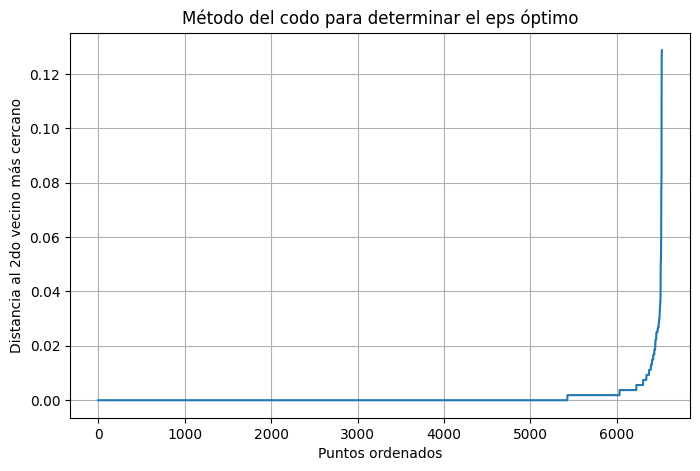

El valor óptimo de eps es: 0.036194030195474625


In [ ]:
## Elección eps
# Usar NearestNeighbors para encontrar las distancias al 2do vecino más cercano
neighbors_4 = NearestNeighbors(n_neighbors=2, metric='precomputed')
neighbors_fit_4 = neighbors_4.fit(D_4)
distances_4, indices_4 = neighbors_fit_4.kneighbors(D_4)

# Ordenar las distancias al segundo vecino (excluyendo la distancia a sí mismo)
distances_4 = np.sort(distances_4[:, 1])

# Graficar las distancias ordenadas
plt.figure(figsize=(8, 5))
plt.plot(distances_4)
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 2do vecino más cercano')
plt.title('Método del codo para determinar el eps óptimo')
plt.grid(True)
plt.show()

# Usar KneeLocator para encontrar el punto de rodilla
kl_4 = KneeLocator(range(len(distances_4)), distances_4, curve="convex", direction="increasing")

# Obtener el valor óptimo de eps
eps_optimo_4 = distances_4[kl_4.elbow]
print(f"El valor óptimo de eps es: {eps_optimo_4}")

In [ ]:
# Elección min_samples
# Como tenemos más de 2 dimensiones usaremos el criterio de Sander et al., (1998) quienes sugieren utilizar al menos min_samples= 2*dim.

# Definir y ajustar el modelo DBSCAN con el eps óptimo
dbscan_4 = DBSCAN(eps=eps_optimo_4, min_samples=18, metric='precomputed')
dbscan_4.fit(D_4)

# Añadir los clusters de DBSCAN a los datos originales
df_4['Cluster4'] = dbscan_4.labels_

Cantidad de registros por cluster:
Cluster4
 2     1288
 7     1231
 3     1067
 5      585
 0      521
 4      344
-1      251
 10     249
 15     247
 1      220
 14     124
 9       72
 12      66
 16      56
 8       46
 6       43
 11      43
 13      35
 17      34
Name: count, dtype: int64


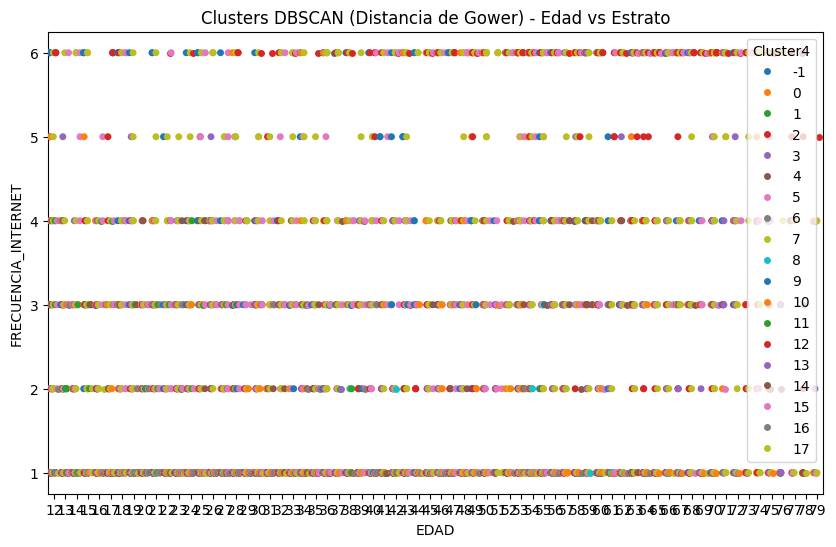

In [ ]:
# ------------------------------
# Resumen de clusters encontrados
# ------------------------------
print("Cantidad de registros por cluster:")
print(df_4['Cluster4'].value_counts())

# ------------------------------
# Visualización simple (ejemplo con EDAD vs Estrato)
# ------------------------------
plt.figure(figsize=(10, 6))
sns.stripplot(x=df_4['EDAD'], y=df_4['FRECUENCIA_INTERNET'],
              hue=df_4['Cluster4'], dodge=True, palette="tab10")
plt.title("Clusters DBSCAN (Distancia de Gower) - Edad vs Estrato")
plt.show()

#### Validación

In [ ]:
# Asegurar que 'Cluster1' esté en formato entero
df_4['Cluster4'] = df_4['Cluster4'].astype(int)

# Preparar las variables para la distancia de Gower (excluyendo la columna 'Cluster1')
X_4 = df_4.drop(columns=['Cluster4'])

# Calcular la matriz de distancias de Gower
gower_dist_matrix_4 = gower.gower_matrix(X_4)

# Calcular el índice de Silhouette usando la matriz de distancias de Gower
silhouette_avg_4 = silhouette_score(gower_dist_matrix_4, df_4['Cluster4'], metric='precomputed')

print(f"Índice de Silhouette con distancia de Gower: {silhouette_avg_4:.3f}")

Índice de Silhouette con distancia de Gower: 0.607


### Experimento 5

Tecer grupo de variables: Edad, Estrato, Area, Servicios_persona, Cantidad equipos, Frecuencia_internet, Recencia compra, Recencia venta,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AÑO                      7662 non-null   int64  
 1   GPSLAT                   6620 non-null   float64
 2   GPSLONG                  6620 non-null   float64
 3   SECTOR                   7662 non-null   int64  
 4   SECCION                  7662 non-null   int64  
 5   MANZANA                  7662 non-null   int64  
 6   DIRECCION_FILTRO         7662 non-null   object 
 7   DANE5                    7662 non-null   int64  
 8   AREA                     7662 non-null   int64  
 9   PERSONAS                 7662 non-null   int64  
 10  EDAD                     7662 non-null   int64  
 11  REDAD                    7662 non-null   int64  
 12  GENERO                   7662 non-null   int64  
 13  ESTRATO                  7662 non-null   int64  
 14  SERVICIOS_PERSONA       

In [ ]:
df_5 = df[['AREA', 'EDAD', 'FRECUENCIA_INTERNET',  "Celular", "Internet_fijo", "Internet_cel_tab", "Internet_movil", "Ninguno", "CANTIDAD_EQUIPOS"]].dropna()

In [ ]:
df_5

AREA  EDAD  FRECUENCIA_INTERNET  Celular  Internet_fijo  \
3        1    38                  1.0        0              1   
4        1    43                  2.0        1              1   
5        1    66                  1.0        1              1   
8        1    14                  1.0        1              1   
9        1    28                  1.0        0              0   
...    ...   ...                  ...      ...            ...   
7657     1    69                  1.0        0              1   
7658     1    24                  1.0        1              1   
7659     1    47                  1.0        1              1   
7660     1    58                  4.0        1              1   
7661     1    34                  1.0        1              1   

      Internet_cel_tab  Internet_movil  Ninguno  CANTIDAD_EQUIPOS  
3                    0               0        0                 1  
4                    1               1        0                 3  
5                    0               0        0                 1  
8                    1               0        0                 1  
9                    1               0        0                 2  
...                ...             ...      ...               ...  
7657                 0               0        0                 2  
7658                 0               0        0                 4  
7659                 1               0        0                 2  
7660                 0               0        0                 2  
7661                 0               0        0                 2  

[6522 rows x 9 columns]

In [ ]:
df_5['AREA'] = df_5['AREA'].replace({1: 'URBANA', 2: 'RURAL'})
#df_5['DANE5'] = df_5['DANE5'].astype(int)
#df_4['ESTRATO'] = df_4['ESTRATO'].astype(int)
#df_4['FRECUENCIA_INTERNET'] = df_4['FRECUENCIA_INTERNET'].astype(int)
#df_4['GENERO'] = df_4['GENERO'].replace({1: 'MASCULINO', 2: 'FEMENINO'})

In [ ]:
# ------------------------------
# Calcular matriz de distancia de Gower
# ------------------------------
D_5 = gower.gower_matrix(df_5)

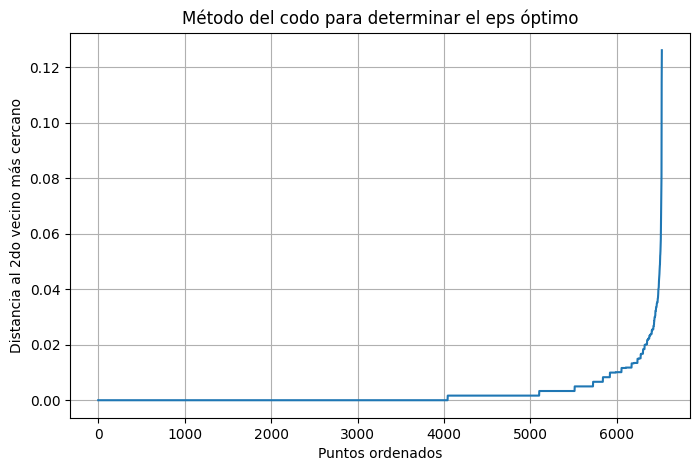

El valor óptimo de eps es: 0.03527815267443657


In [ ]:
## Elección eps
# Usar NearestNeighbors para encontrar las distancias al 2do vecino más cercano
neighbors_5 = NearestNeighbors(n_neighbors=2, metric='precomputed')
neighbors_fit_5 = neighbors_5.fit(D_5)
distances_5, indices_5 = neighbors_fit_5.kneighbors(D_5)

# Ordenar las distancias al segundo vecino (excluyendo la distancia a sí mismo)
distances_5 = np.sort(distances_5[:, 1])

# Graficar las distancias ordenadas
plt.figure(figsize=(8, 5))
plt.plot(distances_5)
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 2do vecino más cercano')
plt.title('Método del codo para determinar el eps óptimo')
plt.grid(True)
plt.show()

# Usar KneeLocator para encontrar el punto de rodilla
kl_5 = KneeLocator(range(len(distances_5)), distances_5, curve="convex", direction="increasing")

# Obtener el valor óptimo de eps
eps_optimo_5 = distances_5[kl_5.elbow]
print(f"El valor óptimo de eps es: {eps_optimo_5}")

In [ ]:
# Elección min_samples
# Como tenemos más de 2 dimensiones usaremos el criterio de Sander et al., (1998) quienes sugieren utilizar al menos min_samples= 2*dim.

# Definir y ajustar el modelo DBSCAN con el eps óptimo
dbscan_5 = DBSCAN(eps=eps_optimo_5, min_samples=18, metric='precomputed')
dbscan_5.fit(D_5)

# Añadir los clusters de DBSCAN a los datos originales
df_5['Cluster5'] = dbscan_5.labels_

Cantidad de registros por cluster:
Cluster5
 1     1280
 5     1228
 2     1050
 4      582
 0      516
-1      379
 3      339
 12     248
 8      240
 7      213
 11     124
 10      66
 16      64
 13      52
 14      41
 9       36
 6       33
 15      31
Name: count, dtype: int64


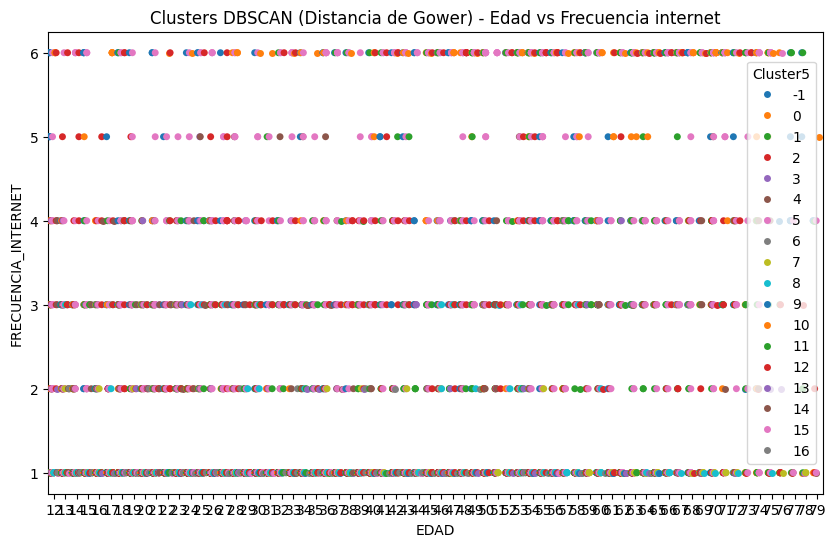

In [ ]:
# ------------------------------
# Resumen de clusters encontrados
# ------------------------------
print("Cantidad de registros por cluster:")
print(df_5['Cluster5'].value_counts())

# ------------------------------
# Visualización simple (ejemplo con EDAD vs Estrato)
# ------------------------------
plt.figure(figsize=(10, 6))
sns.stripplot(x=df_5['EDAD'], y=df_5['FRECUENCIA_INTERNET'],
              hue=df_5['Cluster5'], dodge=True, palette="tab10")
plt.title("Clusters DBSCAN (Distancia de Gower) - Edad vs Frecuencia internet")
plt.show()

#### Validación

In [ ]:
# Asegurar que 'Cluster1' esté en formato entero
df_5['Cluster5'] = df_5['Cluster5'].astype(int)

# Preparar las variables para la distancia de Gower (excluyendo la columna 'Cluster1')
X_5 = df_5.drop(columns=['Cluster5'])

# Calcular la matriz de distancias de Gower
gower_dist_matrix_5 = gower.gower_matrix(X_5)

# Calcular el índice de Silhouette usando la matriz de distancias de Gower
silhouette_avg_5 = silhouette_score(gower_dist_matrix_5, df_5['Cluster5'], metric='precomputed')

print(f"Índice de Silhouette con distancia de Gower: {silhouette_avg_5:.3f}")

Índice de Silhouette con distancia de Gower: 0.528


### Experimento 6

Tecer grupo de variables: Edad, Estrato, Area, Servicios_persona, Cantidad equipos, Frecuencia_internet, Recencia compra, Recencia venta,

In [ ]:
df_6 = df[['AREA', 'EDAD', "Celular", "Internet_fijo", "Internet_cel_tab", "Internet_movil", "Ninguno" , "ACTIVIDAD_INTERNET"]].dropna()

In [ ]:
df_6["CANTIDAD_ACTIVIDAD"] = df_6["ACTIVIDAD_INTERNET"].apply(lambda x: 0 if str(x) == "88" else len(str(x)) // 2)

In [ ]:
df_6 = df_6.drop(columns=["ACTIVIDAD_INTERNET"])

In [ ]:
df_6

AREA  EDAD  Celular  Internet_fijo  Internet_cel_tab  Internet_movil  \
0        1    69        0              0                 0               0   
1        1    56        1              0                 0               0   
2        1    64        1              0                 0               0   
3        1    38        0              1                 0               0   
4        1    43        1              1                 1               1   
...    ...   ...      ...            ...               ...             ...   
7657     1    69        0              1                 0               0   
7658     1    24        1              1                 0               0   
7659     1    47        1              1                 1               0   
7660     1    58        1              1                 0               0   
7661     1    34        1              1                 0               0   

      Ninguno  CANTIDAD_ACTIVIDAD  
0           1                   0  
1           0                   0  
2           0                   0  
3           0                   1  
4           0                  14  
...       ...                 ...  
7657        0                   6  
7658        0                   6  
7659        0                  22  
7660        0                   7  
7661        0                  15  

[7662 rows x 8 columns]

In [ ]:
df_6['AREA'] = df_6['AREA'].replace({1: 'URBANA', 2: 'RURAL'})
#df_6['NIVEL_PIRAMIDE'] = df_6['NIVEL_PIRAMIDE'].astype(int)
#df_4['FRECUENCIA_INTERNET'] = df_4['FRECUENCIA_INTERNET'].astype(int)
#df_4['GENERO'] = df_4['GENERO'].replace({1: 'MASCULINO', 2: 'FEMENINO'})

In [ ]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AREA                7662 non-null   object
 1   EDAD                7662 non-null   int64 
 2   Celular             7662 non-null   int64 
 3   Internet_fijo       7662 non-null   int64 
 4   Internet_cel_tab    7662 non-null   int64 
 5   Internet_movil      7662 non-null   int64 
 6   Ninguno             7662 non-null   int64 
 7   CANTIDAD_ACTIVIDAD  7662 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 479.0+ KB


In [ ]:
# ------------------------------
# Calcular matriz de distancia de Gower
# ------------------------------
D_6 = gower.gower_matrix(df_6)

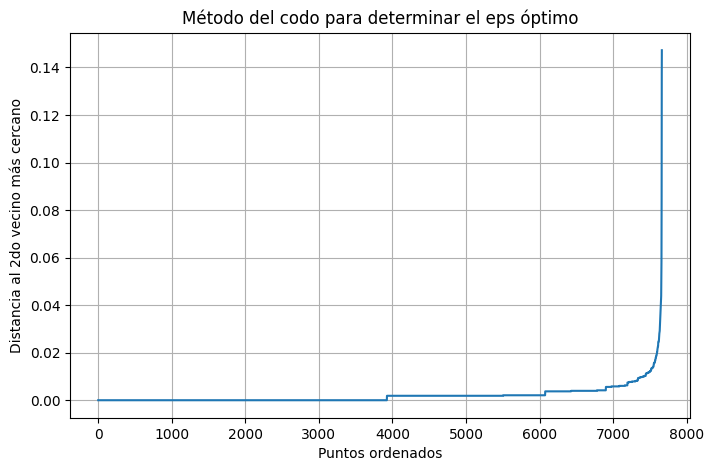

El valor óptimo de eps es: 0.02829601988196373


In [ ]:
## Elección eps
# Usar NearestNeighbors para encontrar las distancias al 2do vecino más cercano
neighbors_6 = NearestNeighbors(n_neighbors=2, metric='precomputed')
neighbors_fit_6 = neighbors_6.fit(D_6)
distances_6, indices_6 = neighbors_fit_6.kneighbors(D_6)

# Ordenar las distancias al segundo vecino (excluyendo la distancia a sí mismo)
distances_6 = np.sort(distances_6[:, 1])

# Graficar las distancias ordenadas
plt.figure(figsize=(8, 5))
plt.plot(distances_6)
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 2do vecino más cercano')
plt.title('Método del codo para determinar el eps óptimo')
plt.grid(True)
plt.show()

# Usar KneeLocator para encontrar el punto de rodilla
kl_6 = KneeLocator(range(len(distances_6)), distances_6, curve="convex", direction="increasing")

# Obtener el valor óptimo de eps
eps_optimo_6 = distances_6[kl_6.elbow]
print(f"El valor óptimo de eps es: {eps_optimo_6}")

In [ ]:
# Elección min_samples
# Como tenemos más de 2 dimensiones usaremos el criterio de Sander et al., (1998) quienes sugieren utilizar al menos min_samples= 2*dim.

# Definir y ajustar el modelo DBSCAN con el eps óptimo
dbscan_6 = DBSCAN(eps=eps_optimo_6, min_samples=16, metric='precomputed')
dbscan_6.fit(D_6)

# Añadir los clusters de DBSCAN a los datos originales
df_6['Cluster6'] = dbscan_6.labels_

Cantidad de registros por cluster:
Cluster6
 1     1889
 4     1288
 5     1071
 6      595
 2      519
 10     409
 0      393
 7      341
-1      289
 9      251
 3      227
 11     128
 8       82
 13      58
 12      55
 15      26
 14      25
 16      16
Name: count, dtype: int64


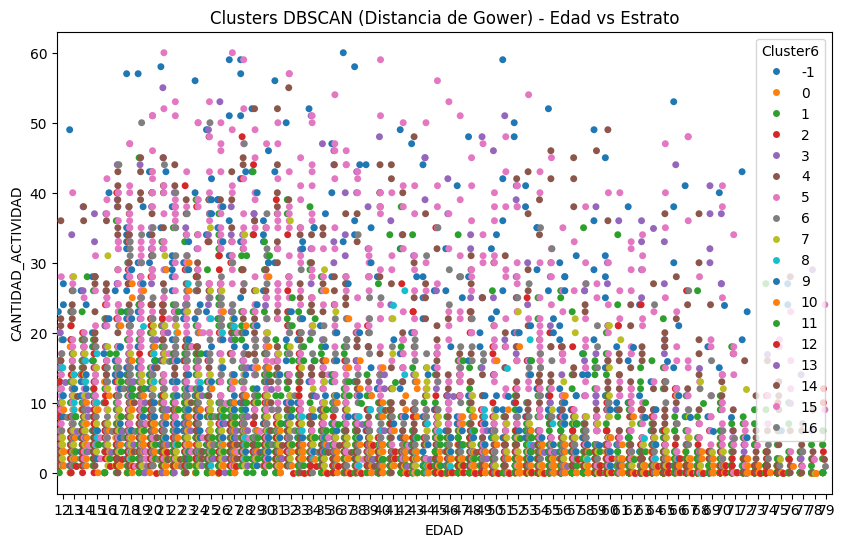

In [ ]:
# ------------------------------
# Resumen de clusters encontrados
# ------------------------------
print("Cantidad de registros por cluster:")
print(df_6['Cluster6'].value_counts())

# ------------------------------
# Visualización simple (ejemplo con EDAD vs Estrato)
# ------------------------------
plt.figure(figsize=(10, 6))
sns.stripplot(x=df_6['EDAD'], y=df_6['CANTIDAD_ACTIVIDAD'],
              hue=df_6['Cluster6'], dodge=True, palette="tab10")
plt.title("Clusters DBSCAN (Distancia de Gower) - Edad vs Estrato")
plt.show()

#### Validación

In [ ]:
# Asegurar que 'Cluster1' esté en formato entero
df_6['Cluster6'] = df_6['Cluster6'].astype(int)

# Preparar las variables para la distancia de Gower (excluyendo la columna 'Cluster1')
X_6 = df_6.drop(columns=['Cluster6'])

# Calcular la matriz de distancias de Gower
gower_dist_matrix_6 = gower.gower_matrix(X_6)

# Calcular el índice de Silhouette usando la matriz de distancias de Gower
silhouette_avg_6 = silhouette_score(gower_dist_matrix_6, df_6['Cluster6'], metric='precomputed')

print(f"Índice de Silhouette con distancia de Gower: {silhouette_avg_6:.3f}")

Índice de Silhouette con distancia de Gower: 0.628


### Experimento 7

In [ ]:
df_7 = df[['AREA', 'EDAD', "Celular", "Internet_fijo", "Internet_cel_tab", "Internet_movil", "Ninguno" , "ACTIVIDAD_INTERNET"]].dropna()

In [ ]:
df_7["CANTIDAD_ACTIVIDAD"] = df_7["ACTIVIDAD_INTERNET"].apply(lambda x: 0 if str(x) == "88" else len(str(x)) // 2)

In [ ]:
df_7 = df_7.drop(columns=["ACTIVIDAD_INTERNET"])

In [ ]:
df_7

AREA  EDAD  Celular  Internet_fijo  Internet_cel_tab  Internet_movil  \
0        1    69        0              0                 0               0   
1        1    56        1              0                 0               0   
2        1    64        1              0                 0               0   
3        1    38        0              1                 0               0   
4        1    43        1              1                 1               1   
...    ...   ...      ...            ...               ...             ...   
7657     1    69        0              1                 0               0   
7658     1    24        1              1                 0               0   
7659     1    47        1              1                 1               0   
7660     1    58        1              1                 0               0   
7661     1    34        1              1                 0               0   

      Ninguno  CANTIDAD_ACTIVIDAD  
0           1                   0  
1           0                   0  
2           0                   0  
3           0                   1  
4           0                  14  
...       ...                 ...  
7657        0                   6  
7658        0                   6  
7659        0                  22  
7660        0                   7  
7661        0                  15  

[7662 rows x 8 columns]

In [ ]:
df_7['AREA'] = df_7['AREA'].replace({1: 'URBANA', 2: 'RURAL'})
#df_6['NIVEL_PIRAMIDE'] = df_6['NIVEL_PIRAMIDE'].astype(int)
#df_4['FRECUENCIA_INTERNET'] = df_4['FRECUENCIA_INTERNET'].astype(int)
#df_4['GENERO'] = df_4['GENERO'].replace({1: 'MASCULINO', 2: 'FEMENINO'})

In [ ]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AREA                7662 non-null   object
 1   EDAD                7662 non-null   int64 
 2   Celular             7662 non-null   int64 
 3   Internet_fijo       7662 non-null   int64 
 4   Internet_cel_tab    7662 non-null   int64 
 5   Internet_movil      7662 non-null   int64 
 6   Ninguno             7662 non-null   int64 
 7   CANTIDAD_ACTIVIDAD  7662 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 479.0+ KB


In [ ]:
# ------------------------------
# Calcular matriz de distancia de Gower
# ------------------------------
D_7 = gower.gower_matrix(df_7)

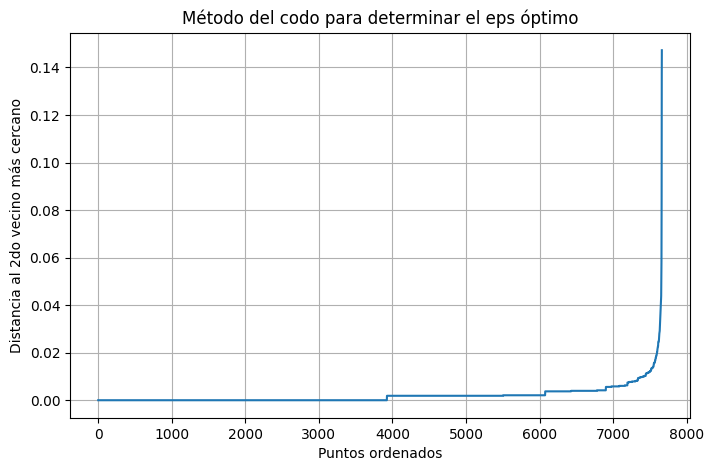

El valor óptimo de eps es: 0.02829601988196373


In [ ]:
## Elección eps
# Usar NearestNeighbors para encontrar las distancias al 2do vecino más cercano
neighbors_7 = NearestNeighbors(n_neighbors=2, metric='precomputed')
neighbors_fit_7 = neighbors_7.fit(D_6)
distances_7, indices_7 = neighbors_fit_7.kneighbors(D_7)

# Ordenar las distancias al segundo vecino (excluyendo la distancia a sí mismo)
distances_7 = np.sort(distances_7[:, 1])

# Graficar las distancias ordenadas
plt.figure(figsize=(8, 5))
plt.plot(distances_6)
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 2do vecino más cercano')
plt.title('Método del codo para determinar el eps óptimo')
plt.grid(True)
plt.show()

# Usar KneeLocator para encontrar el punto de rodilla
kl_7 = KneeLocator(range(len(distances_7)), distances_7, curve="convex", direction="increasing")

# Obtener el valor óptimo de eps
eps_optimo_7 = distances_7[kl_7.elbow]
print(f"El valor óptimo de eps es: {eps_optimo_7}")

In [ ]:
# Elección min_samples
# Como tenemos más de 2 dimensiones usaremos el criterio de Sander et al., (1998) quienes sugieren utilizar al menos min_samples= 2*dim.

# Definir y ajustar el modelo DBSCAN con el eps óptimo
dbscan_7 = DBSCAN(eps=eps_optimo_7*1.3, min_samples=16, metric='precomputed')
dbscan_7.fit(D_7)

# Añadir los clusters de DBSCAN a los datos originales
df_7['Cluster7'] = dbscan_7.labels_

Cantidad de registros por cluster:
Cluster7
 1     1893
 4     1289
 5     1071
 7      599
 2      524
 13     414
 0      394
 6      349
 11     255
 3      232
 14     129
-1      122
 10      83
 15      64
 16      57
 9       49
 8       42
 12      39
 17      37
 18      20
Name: count, dtype: int64


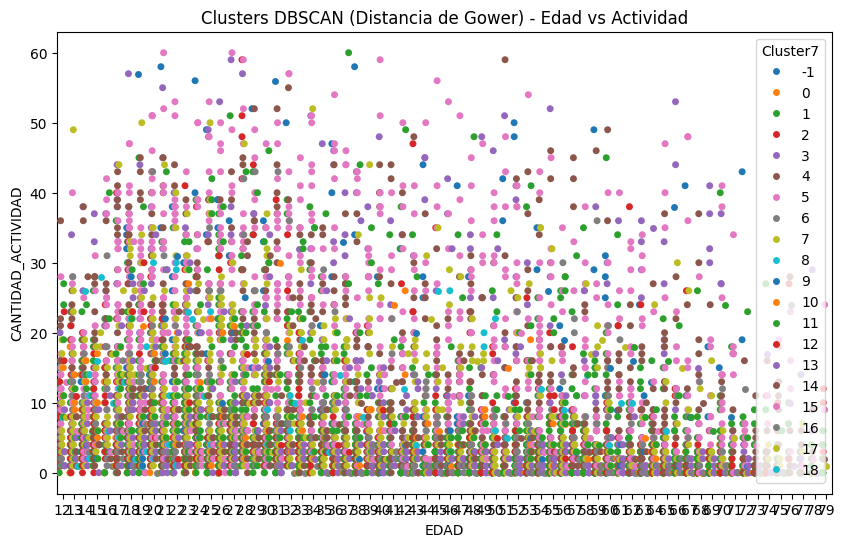

In [ ]:
# ------------------------------
# Resumen de clusters encontrados
# ------------------------------
print("Cantidad de registros por cluster:")
print(df_7['Cluster7'].value_counts())

# ------------------------------
# Visualización simple (ejemplo con EDAD vs Estrato)
# ------------------------------
plt.figure(figsize=(10, 6))
sns.stripplot(x=df_7['EDAD'], y=df_7['CANTIDAD_ACTIVIDAD'],
              hue=df_7['Cluster7'], dodge=True, palette="tab10")
plt.title("Clusters DBSCAN (Distancia de Gower) - Edad vs Actividad")
plt.show()

#### Validación

In [ ]:
# Asegurar que 'Cluster1' esté en formato entero
df_7['Cluster7'] = df_7['Cluster7'].astype(int)

# Preparar las variables para la distancia de Gower (excluyendo la columna 'Cluster1')
X_7 = df_7.drop(columns=['Cluster7'])

# Calcular la matriz de distancias de Gower
gower_dist_matrix_7 = gower.gower_matrix(X_7)

# Calcular el índice de Silhouette usando la matriz de distancias de Gower
silhouette_avg_7 = silhouette_score(gower_dist_matrix_7, df_7['Cluster7'], metric='precomputed')

print(f"Índice de Silhouette con distancia de Gower: {silhouette_avg_7:.3f}")

Índice de Silhouette con distancia de Gower: 0.660


### Experimento 8

In [ ]:
df_8 = df[['AREA', 'EDAD', "Celular", "Internet_fijo", "Internet_cel_tab", "Internet_movil", "Ninguno" , "ACTIVIDAD_INTERNET"]].dropna()

In [ ]:
df_8["CANTIDAD_ACTIVIDAD"] = df_8["ACTIVIDAD_INTERNET"].apply(lambda x: 0 if str(x) == "88" else len(str(x)) // 2)

In [ ]:
df_8 = df_8.drop(columns=["ACTIVIDAD_INTERNET"])

In [ ]:
df_8

AREA  EDAD  Celular  Internet_fijo  Internet_cel_tab  Internet_movil  \
0        1    69        0              0                 0               0   
1        1    56        1              0                 0               0   
2        1    64        1              0                 0               0   
3        1    38        0              1                 0               0   
4        1    43        1              1                 1               1   
...    ...   ...      ...            ...               ...             ...   
7657     1    69        0              1                 0               0   
7658     1    24        1              1                 0               0   
7659     1    47        1              1                 1               0   
7660     1    58        1              1                 0               0   
7661     1    34        1              1                 0               0   

      Ninguno  CANTIDAD_ACTIVIDAD  
0           1                   0  
1           0                   0  
2           0                   0  
3           0                   1  
4           0                  14  
...       ...                 ...  
7657        0                   6  
7658        0                   6  
7659        0                  22  
7660        0                   7  
7661        0                  15  

[7662 rows x 8 columns]

In [ ]:
df_8['AREA'] = df_8['AREA'].replace({1: 'URBANA', 2: 'RURAL'})
#df_6['NIVEL_PIRAMIDE'] = df_6['NIVEL_PIRAMIDE'].astype(int)
#df_4['FRECUENCIA_INTERNET'] = df_4['FRECUENCIA_INTERNET'].astype(int)
#df_4['GENERO'] = df_4['GENERO'].replace({1: 'MASCULINO', 2: 'FEMENINO'})

In [ ]:
df_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AREA                7662 non-null   object
 1   EDAD                7662 non-null   int64 
 2   Celular             7662 non-null   int64 
 3   Internet_fijo       7662 non-null   int64 
 4   Internet_cel_tab    7662 non-null   int64 
 5   Internet_movil      7662 non-null   int64 
 6   Ninguno             7662 non-null   int64 
 7   CANTIDAD_ACTIVIDAD  7662 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 479.0+ KB


In [ ]:
# ------------------------------
# Calcular matriz de distancia de Gower
# ------------------------------
D_8 = gower.gower_matrix(df_8)

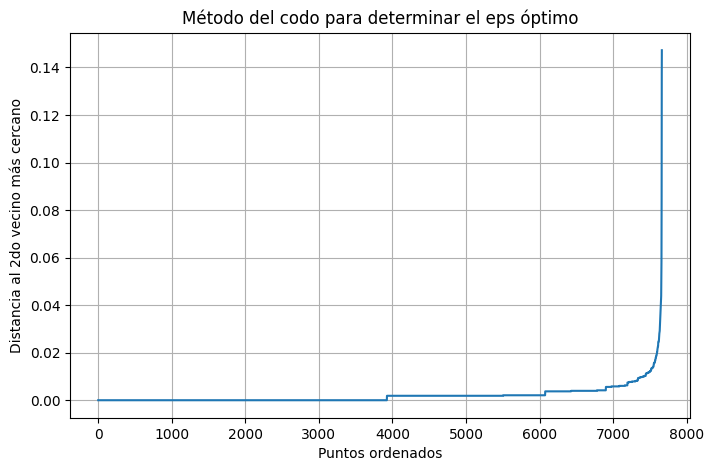

El valor óptimo de eps es: 0.02829601988196373


In [ ]:
## Elección eps
# Usar NearestNeighbors para encontrar las distancias al 2do vecino más cercano
neighbors_8 = NearestNeighbors(n_neighbors=2, metric='precomputed')
neighbors_fit_8 = neighbors_8.fit(D_6)
distances_8, indices_8 = neighbors_fit_8.kneighbors(D_8)

# Ordenar las distancias al segundo vecino (excluyendo la distancia a sí mismo)
distances_8 = np.sort(distances_8[:, 1])

# Graficar las distancias ordenadas
plt.figure(figsize=(8, 5))
plt.plot(distances_6)
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 2do vecino más cercano')
plt.title('Método del codo para determinar el eps óptimo')
plt.grid(True)
plt.show()

# Usar KneeLocator para encontrar el punto de rodilla
kl_8 = KneeLocator(range(len(distances_8)), distances_8, curve="convex", direction="increasing")

# Obtener el valor óptimo de eps
eps_optimo_8 = distances_8[kl_8.elbow]
print(f"El valor óptimo de eps es: {eps_optimo_8}")

In [ ]:
# Elección min_samples
# Como tenemos más de 2 dimensiones usaremos el criterio de Sander et al., (1998) quienes sugieren utilizar al menos min_samples= 2*dim.

# Definir y ajustar el modelo DBSCAN con el eps óptimo
dbscan_8 = DBSCAN(eps=eps_optimo_8, min_samples=24, metric='precomputed')
dbscan_8.fit(D_8)

# Añadir los clusters de DBSCAN a los datos originales
df_8['Cluster8'] = dbscan_8.labels_

Cantidad de registros por cluster:
Cluster8
 1     1885
 4     1286
 5     1071
 6      593
 2      515
-1      410
 10     409
 0      393
 7      340
 9      242
 3      218
 11     124
 8       78
 12      51
 13      47
Name: count, dtype: int64


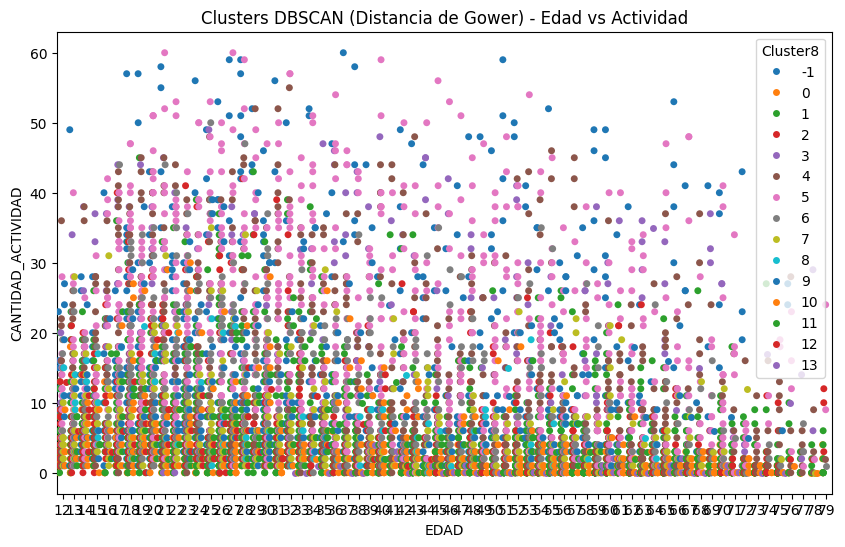

In [ ]:
# ------------------------------
# Resumen de clusters encontrados
# ------------------------------
print("Cantidad de registros por cluster:")
print(df_8['Cluster8'].value_counts())

# ------------------------------
# Visualización simple (ejemplo con EDAD vs Estrato)
# ------------------------------
plt.figure(figsize=(10, 6))
sns.stripplot(x=df_8['EDAD'], y=df_8['CANTIDAD_ACTIVIDAD'],
              hue=df_8['Cluster8'], dodge=True, palette="tab10")
plt.title("Clusters DBSCAN (Distancia de Gower) - Edad vs Actividad")
plt.show()

#### Validación

In [ ]:
# Asegurar que 'Cluster1' esté en formato entero
df_8['Cluster8'] = df_8['Cluster8'].astype(int)

# Preparar las variables para la distancia de Gower (excluyendo la columna 'Cluster1')
X_8 = df_8.drop(columns=['Cluster8'])

# Calcular la matriz de distancias de Gower
gower_dist_matrix_8 = gower.gower_matrix(X_8)

# Calcular el índice de Silhouette usando la matriz de distancias de Gower
silhouette_avg_8 = silhouette_score(gower_dist_matrix_8, df_8['Cluster8'], metric='precomputed')

print(f"Índice de Silhouette con distancia de Gower: {silhouette_avg_8:.3f}")

Índice de Silhouette con distancia de Gower: 0.620


## Comparativo

     Modelo  Silhouette
0  Modelo 1    0.535656
1  Modelo 2    0.492011
2  Modelo 3    0.471091
3  Modelo 4    0.607058
4  Modelo 5    0.527702
5  Modelo 6    0.628213
6  Modelo 7    0.659591
7  Modelo 8    0.619730


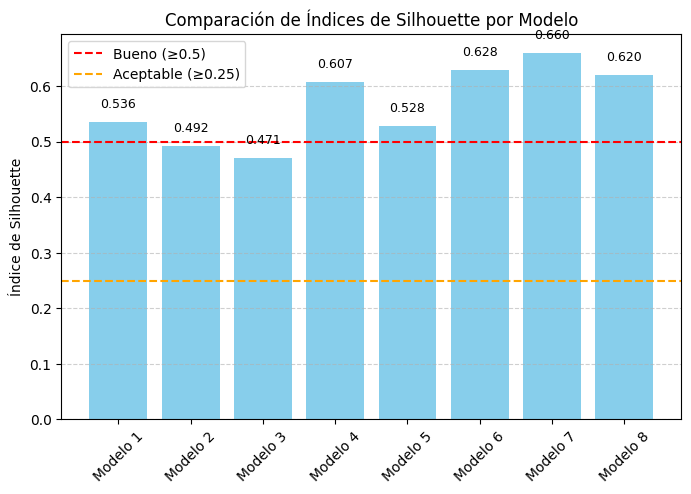

In [ ]:
silhouette_scores = {
    "Modelo 1": silhouette_avg,
    "Modelo 2": silhouette_avg_2,
    "Modelo 3": silhouette_avg_3,
    "Modelo 4": silhouette_avg_4,
    "Modelo 5": silhouette_avg_5,
    "Modelo 6": silhouette_avg_6,
    "Modelo 7": silhouette_avg_7,
    "Modelo 8": silhouette_avg_8
}

# Convertir a DataFrame
df_silhouette = pd.DataFrame(list(silhouette_scores.items()), columns=["Modelo", "Silhouette"])

print(df_silhouette)

# Gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(df_silhouette["Modelo"], df_silhouette["Silhouette"], color="skyblue")

# Líneas de referencia
plt.axhline(0.5, color="red", linestyle="--", label="Bueno (≥0.5)")
plt.axhline(0.25, color="orange", linestyle="--", label="Aceptable (≥0.25)")

# Etiquetas
plt.ylabel("Índice de Silhouette")
plt.title("Comparación de Índices de Silhouette por Modelo")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Agregar valores en cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02,
             f"{height:.3f}", ha="center", va="bottom", fontsize=9)

plt.show()

## Caracterización de clústers

In [ ]:
# Agregar al df la información de los clusters
df["Cluster_1"] = df_7["Cluster7"]
df["Cluster_2"] = df_8["Cluster8"]

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SHP_MGN2018_INTGRD_MPIO.zip to SHP_MGN2018_INTGRD_MPIO.zip


In [ ]:
!unzip /content/SHP_MGN2018_INTGRD_MPIO.zip -d /content/shapefiles

Archive:  /content/SHP_MGN2018_INTGRD_MPIO.zip
  inflating: /content/shapefiles/Diccionario_Datos_Niveles_Variables_MGN_CNPV2018Int.xlsx  
  inflating: /content/shapefiles/MGN_ANM_MPIOS.dbf  
  inflating: /content/shapefiles/MGN_ANM_MPIOS.prj  
  inflating: /content/shapefiles/MGN_ANM_MPIOS.sbn  
  inflating: /content/shapefiles/MGN_ANM_MPIOS.sbx  
  inflating: /content/shapefiles/MGN_ANM_MPIOS.shp  
  inflating: /content/shapefiles/MGN_ANM_MPIOS.shp.xml  
  inflating: /content/shapefiles/MGN_ANM_MPIOS.shx  


In [ ]:
!ls /content/shapefiles

Diccionario_Datos_Niveles_Variables_MGN_CNPV2018Int.xlsx  MGN_ANM_MPIOS.sbx
MGN_ANM_MPIOS.dbf					  MGN_ANM_MPIOS.shp
MGN_ANM_MPIOS.prj					  MGN_ANM_MPIOS.shp.xml
MGN_ANM_MPIOS.sbn					  MGN_ANM_MPIOS.shx


In [ ]:
import geopandas as gpd

municipios = gpd.read_file("/content/shapefiles/MGN_ANM_MPIOS.shp")
print(municipios.head())

  DPTO_CCDGO MPIO_CCDGO                MPIO_CNMBR MPIO_CDPMP  VERSION  \
0         18        001                 FLORENCIA      18001     2018   
1         18        029                   ALBANIA      18029     2018   
2         18        094  BELÃN DE LOS ANDAQUÃES      18094     2018   
3         18        247               EL DONCELLO      18247     2018   
4         18        256                EL PAUJÃL      18256     2018   

           AREA   LATITUD   LONGITUD  STCTNENCUE  STP3_1_SI  ...  STP34_9_ED  \
0  2.547638e+09  1.749139 -75.558239     71877.0       32.0  ...      2244.0   
1  4.141221e+08  1.227865 -75.882327      2825.0       24.0  ...        92.0   
2  1.191619e+09  1.500923 -75.875645      4243.0       54.0  ...       145.0   
3  1.106076e+09  1.791386 -75.193944      8809.0        0.0  ...       348.0   
4  1.234734e+09  1.617746 -75.234043      5795.0        0.0  ...       248.0   

   STP51_PRIM  STP51_SECU  STP51_SUPE  STP51_POST  STP51_13_E  STP51_99_E  \
0  

In [ ]:
municipios["COD_MPIO"] = municipios["DPTO_CCDGO"].astype(str).str.zfill(2) + municipios["MPIO_CCDGO"].astype(str).str.zfill(3)

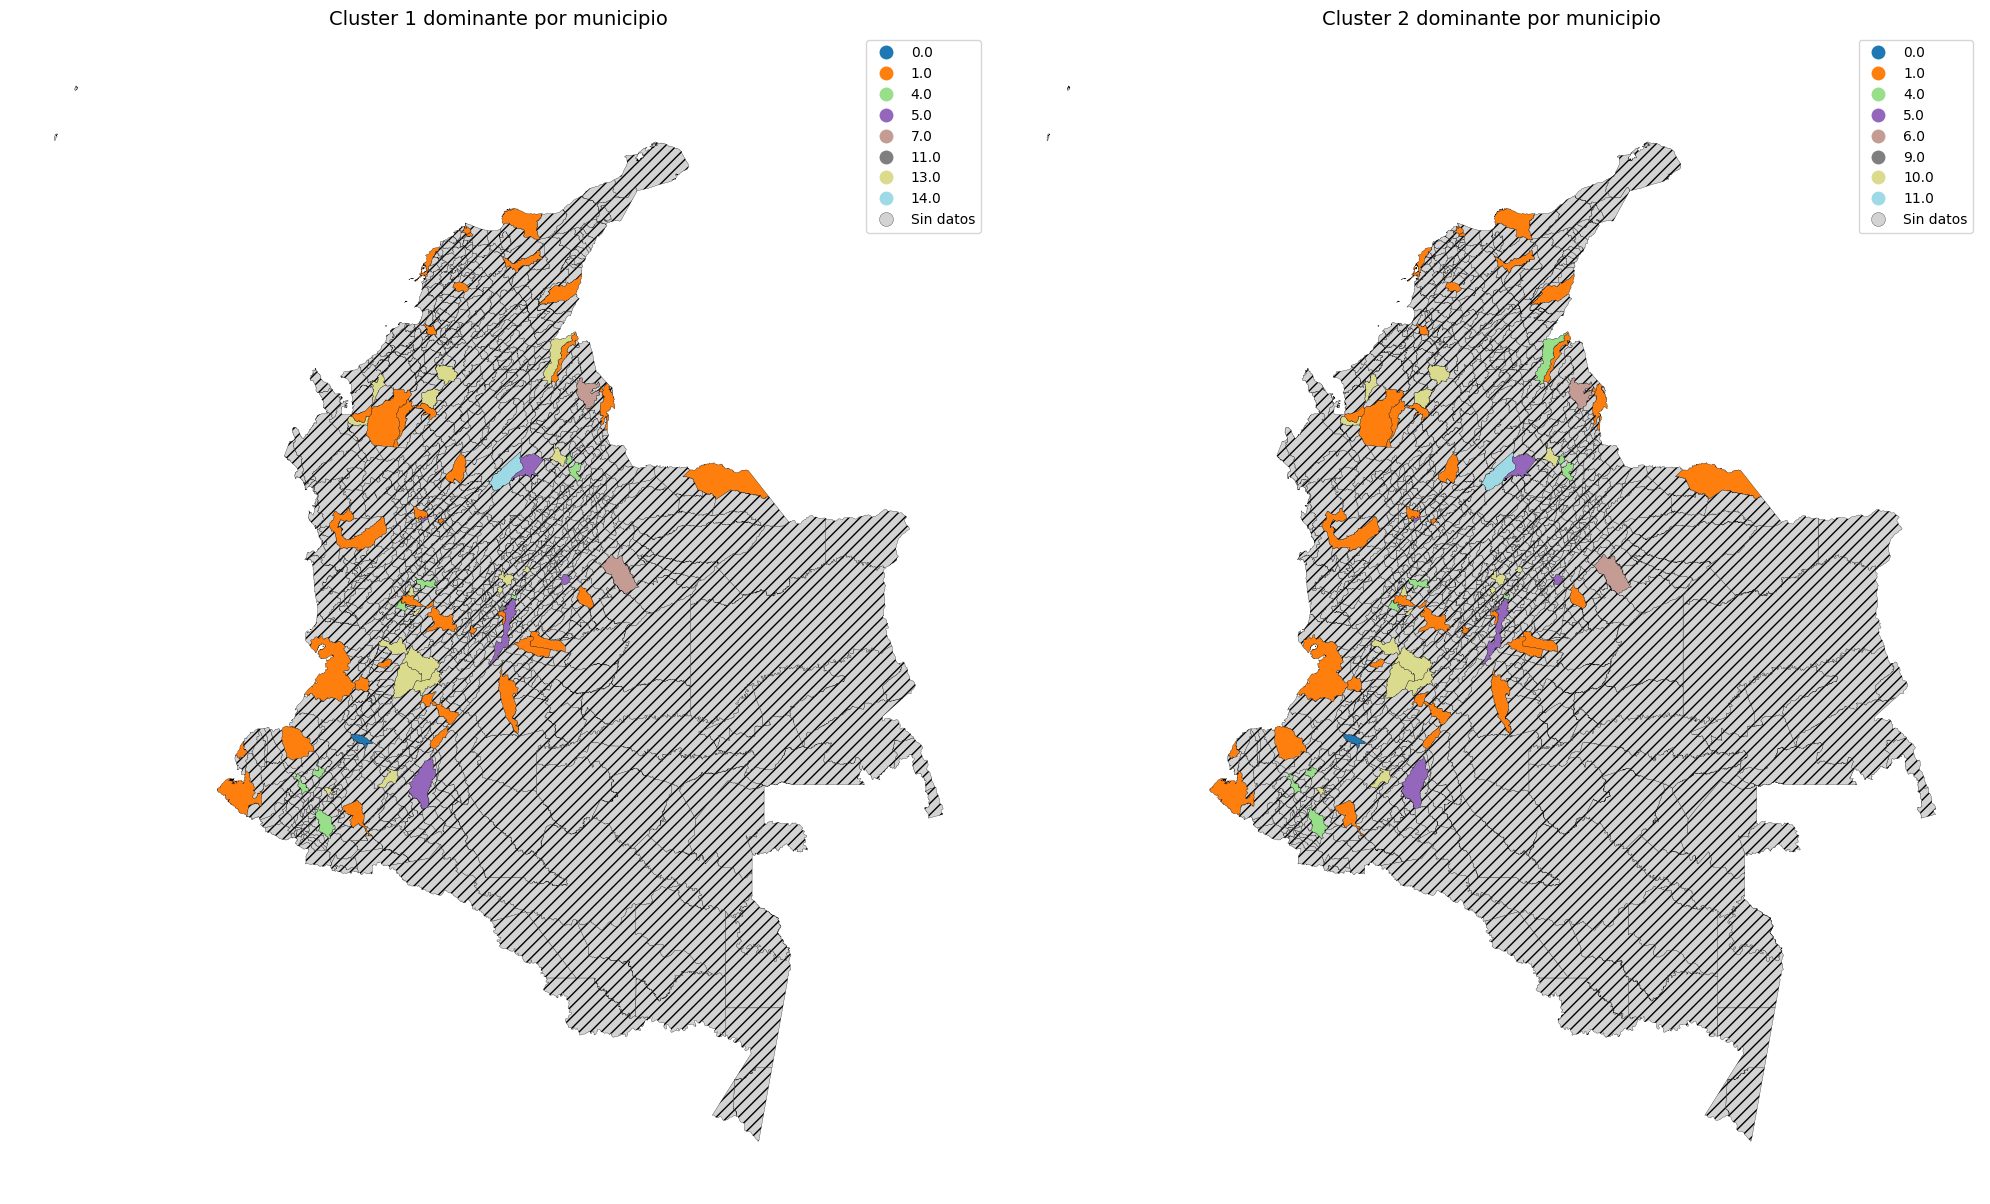

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# --- 1. Asegurar que los códigos sean string de 5 dígitos ---
municipios["COD_MPIO"] = municipios["COD_MPIO"].astype(str).str.zfill(5)
df["DANE5"] = df["DANE5"].astype(str).str.zfill(5)

# --- 2. Calcular moda de Cluster_1 y Cluster_2 por municipio (ignorando -1) ---
def moda_sin_ruido(x):
    x = x[x != -1]  # ignorar ruido
    return x.mode().iloc[0] if not x.mode().empty else -1

moda_cluster1 = df.groupby("DANE5")["Cluster_1"].apply(moda_sin_ruido).reset_index(name="Cluster1_moda")
moda_cluster2 = df.groupby("DANE5")["Cluster_2"].apply(moda_sin_ruido).reset_index(name="Cluster2_moda")

# --- 3. Unir la info al GeoDataFrame ---
geo_cluster = municipios.merge(moda_cluster1, left_on="COD_MPIO", right_on="DANE5", how="left")
geo_cluster = geo_cluster.merge(moda_cluster2, left_on="COD_MPIO", right_on="DANE5", how="left")

# --- 4. Graficar lado a lado ---
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# Cluster 1
geo_cluster.plot(
    column="Cluster1_moda",
    categorical=True,
    legend=True,
    cmap="tab20",
    linewidth=0.2,
    edgecolor="black",
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "black",
        "hatch": "///",
        "label": "Sin datos"
    },
    ax=axes[0]
)
axes[0].set_title("Cluster 1 dominante por municipio", fontsize=14)
axes[0].axis("off")

# Cluster 2
geo_cluster.plot(
    column="Cluster2_moda",
    categorical=True,
    legend=True,
    cmap="tab20",
    linewidth=0.2,
    edgecolor="black",
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "black",
        "hatch": "///",
        "label": "Sin datos"
    },
    ax=axes[1]
)
axes[1].set_title("Cluster 2 dominante por municipio", fontsize=14)
axes[1].axis("off")

plt.tight_layout()
plt.show()


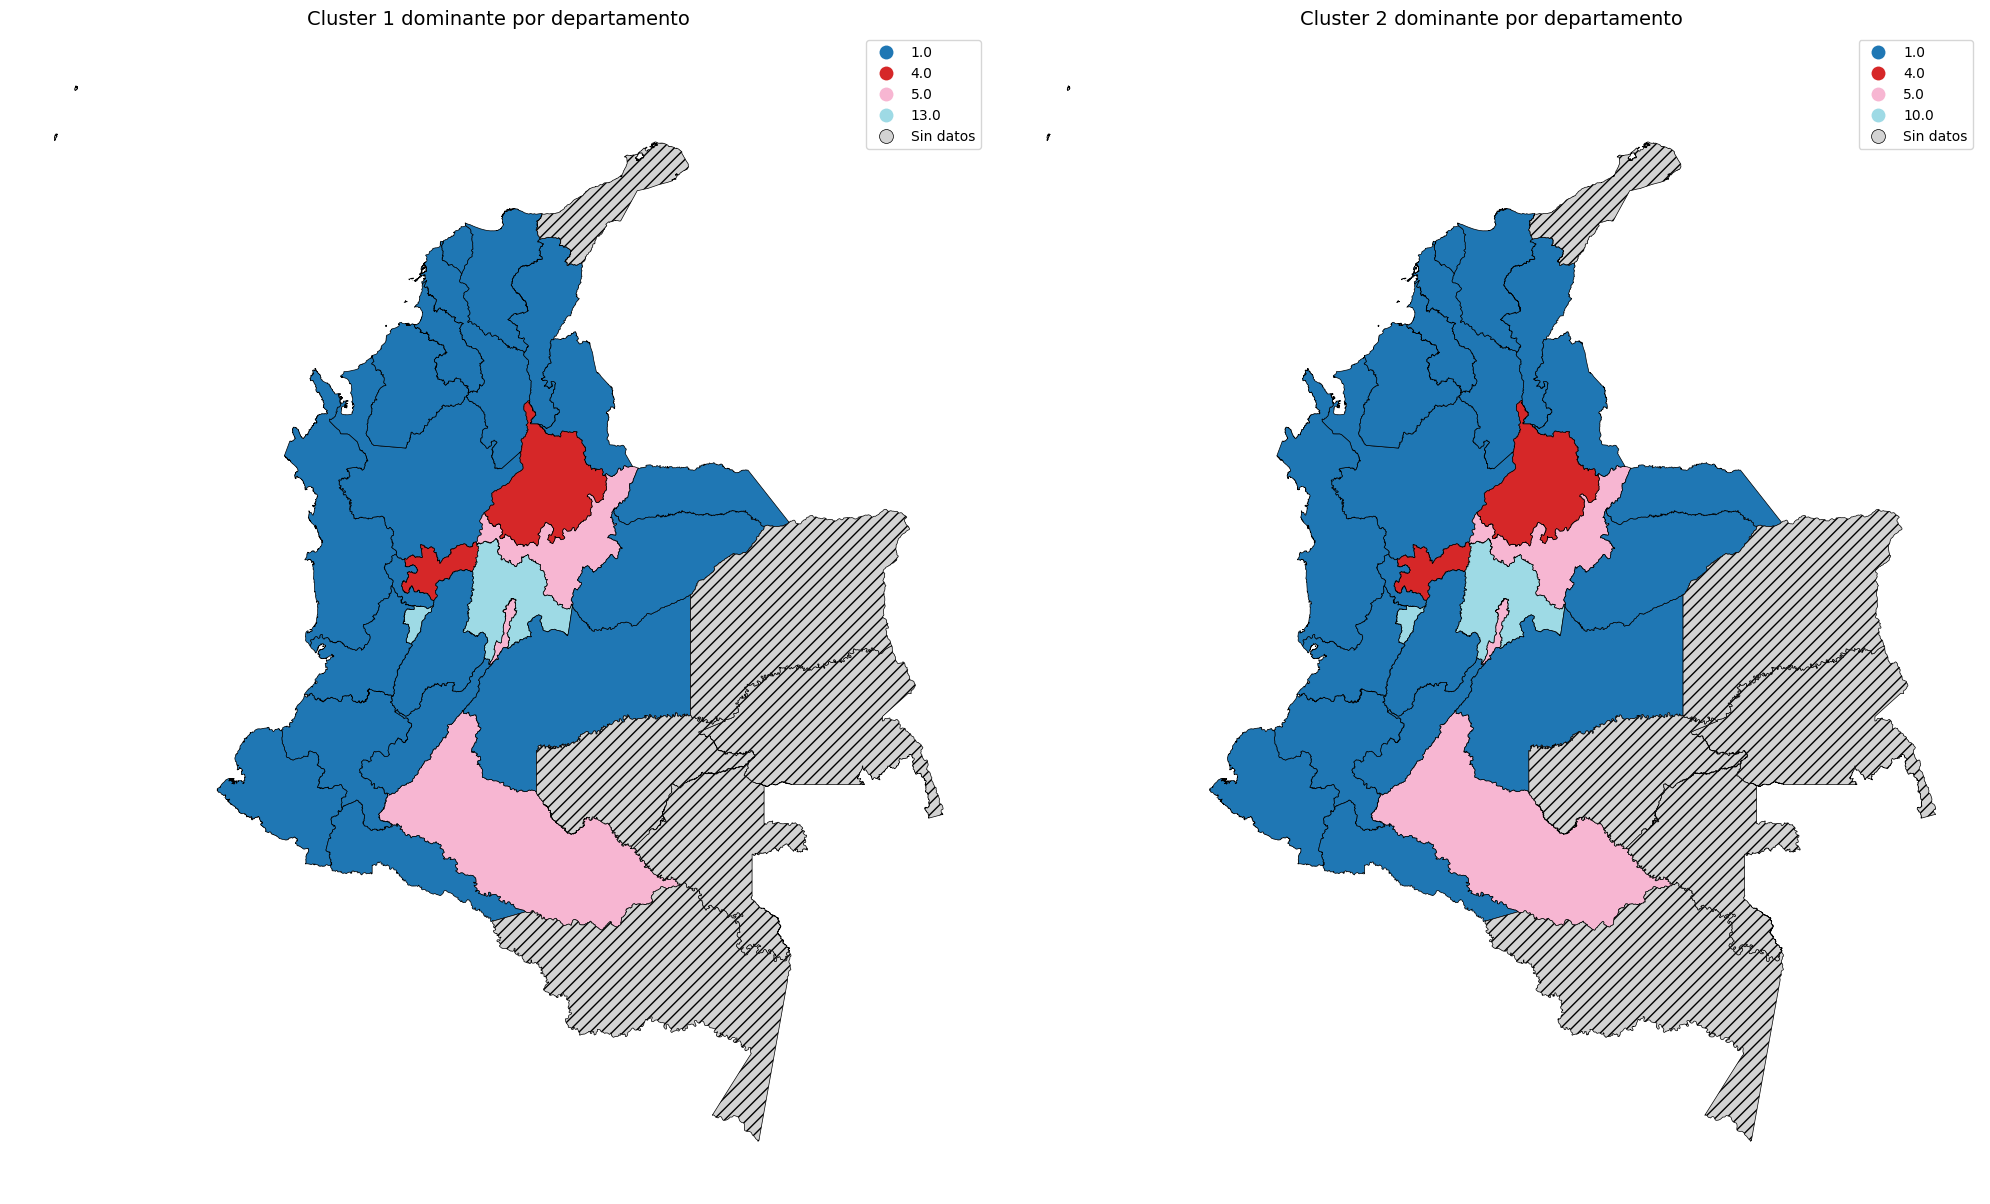

In [ ]:
# 1. Crear columna de departamento en df (2 primeros dígitos de DANE5)
df["DEPTO"] = df["DANE5"].str[:2]

# 2. Moda de clusters por departamento (ignorando ruido -1)
def moda_sin_ruido(x):
    x = x[x != -1]
    return x.mode().iloc[0] if not x.mode().empty else -1

moda_depto1 = df.groupby("DEPTO")["Cluster_1"].apply(moda_sin_ruido).reset_index(name="Cluster1_moda")
moda_depto2 = df.groupby("DEPTO")["Cluster_2"].apply(moda_sin_ruido).reset_index(name="Cluster2_moda")

# 3. Crear shapefile departamental desde el de municipios
#    Dissolve une todos los municipios de un mismo DPTO_CCDGO
deptos = municipios.dissolve(by="DPTO_CCDGO", as_index=False)

# Asegurar formato string de 2 dígitos
deptos["DPTO_CCDGO"] = deptos["DPTO_CCDGO"].astype(str).str.zfill(2)

# 4. Unir con las modas
geo_deptos = deptos.merge(moda_depto1, left_on="DPTO_CCDGO", right_on="DEPTO", how="left")
geo_deptos = geo_deptos.merge(moda_depto2, left_on="DPTO_CCDGO", right_on="DEPTO", how="left")

# 5. Graficar lado a lado
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# Cluster 1
geo_deptos.plot(
    column="Cluster1_moda",
    categorical=True,
    legend=True,
    cmap="tab20",
    linewidth=0.5,
    edgecolor="black",
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "black",
        "hatch": "///",
        "label": "Sin datos"
    },
    ax=axes[0]
)
axes[0].set_title("Cluster 1 dominante por departamento", fontsize=14)
axes[0].axis("off")

# Cluster 2
geo_deptos.plot(
    column="Cluster2_moda",
    categorical=True,
    legend=True,
    cmap="tab20",
    linewidth=0.5,
    edgecolor="black",
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "black",
        "hatch": "///",
        "label": "Sin datos"
    },
    ax=axes[1]
)
axes[1].set_title("Cluster 2 dominante por departamento", fontsize=14)
axes[1].axis("off")

plt.tight_layout()
plt.show()

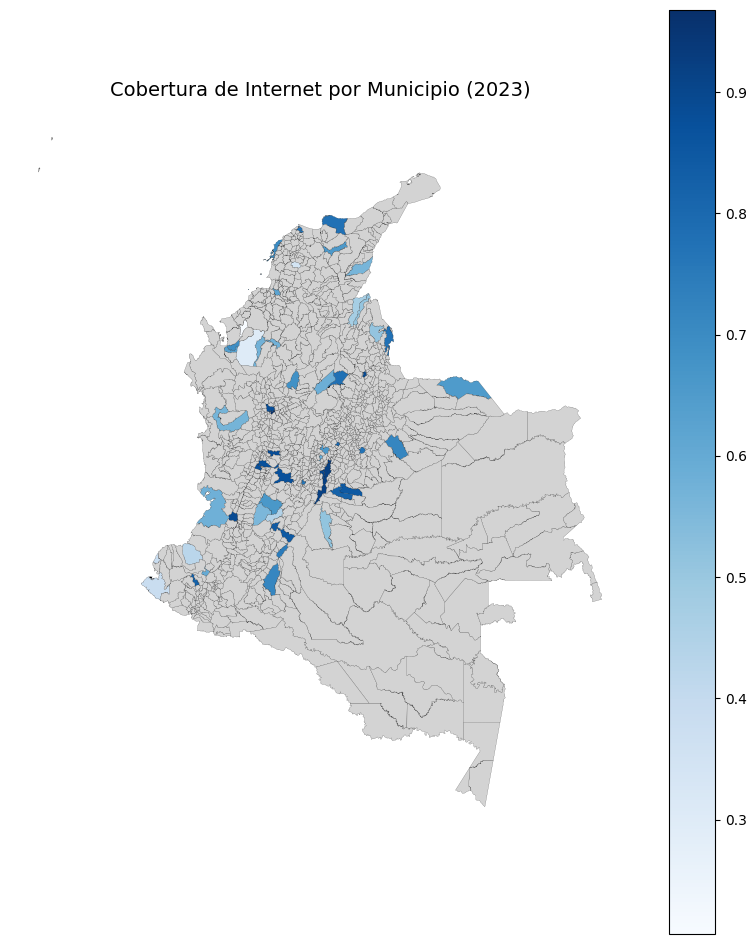

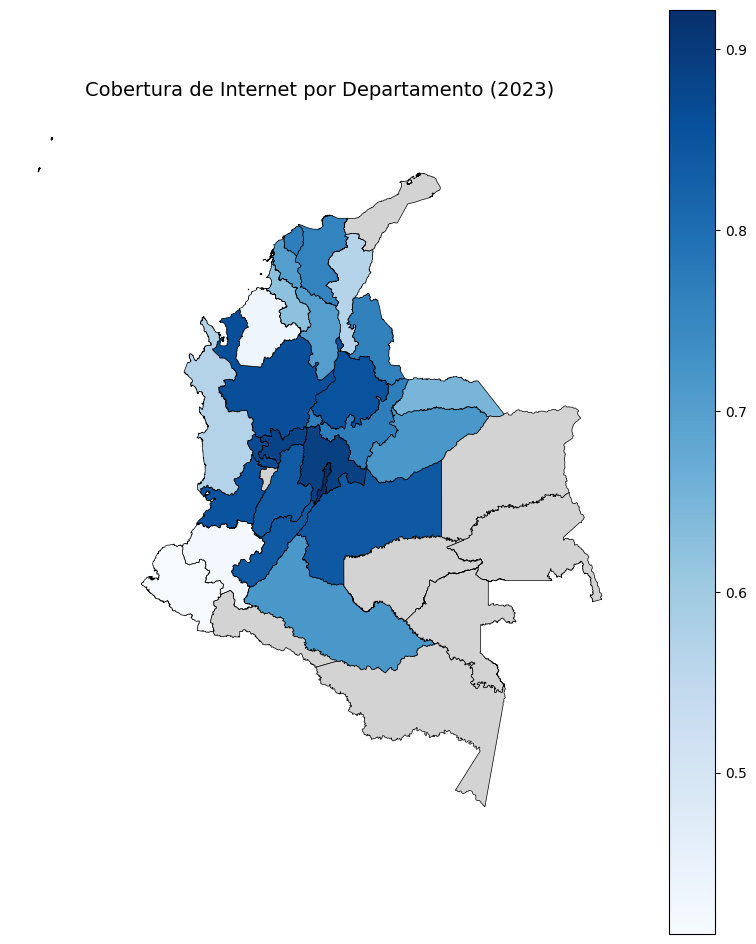

In [ ]:
# 1. Filtrar solo el año 2023
df_2023 = df[df["AÑO"] == 2023].copy()

# 2. Mantener solo las columnas necesarias y eliminar duplicados por municipio
df_mpios = df_2023[["DANE5", "HOGARES_INTERNET", "POBLACIÓN_ICFES"]].drop_duplicates()

# 3. Calcular tasa de cobertura por municipio
df_mpios["Cobertura"] = df_mpios["HOGARES_INTERNET"] / df_mpios["POBLACIÓN_ICFES"]

# 4. Unir con shapefile de municipios
geo_mpios = municipios.merge(df_mpios, left_on="COD_MPIO", right_on="DANE5", how="left")

# --- Mapa municipal ---
fig, ax = plt.subplots(figsize=(10, 12))
geo_mpios.plot(
    column="Cobertura",
    cmap="Blues",
    legend=True,
    linewidth=0.1,
    edgecolor="black",
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "black",
        "label": "Sin datos"
    },
    ax=ax
)
ax.set_title("Cobertura de Internet por Municipio (2023)", fontsize=14)
ax.axis("off")
plt.show()

# 5. Calcular tasa por departamento
# Crear columna de departamento
df_mpios["DEPTO"] = df_mpios["DANE5"].str[:2]

# Agregar por departamento (sumando hogares y población)
df_deptos = df_mpios.groupby("DEPTO").agg(
    HOGARES_INTERNET=("HOGARES_INTERNET", "sum"),
    POBLACION=("POBLACIÓN_ICFES", "sum")
).reset_index()

df_deptos["Cobertura"] = df_deptos["HOGARES_INTERNET"] / df_deptos["POBLACION"]

# Unir con shapefile departamental
deptos = municipios.dissolve(by="DPTO_CCDGO", as_index=False)
deptos["DPTO_CCDGO"] = deptos["DPTO_CCDGO"].astype(str).str.zfill(2)

geo_deptos = deptos.merge(df_deptos, left_on="DPTO_CCDGO", right_on="DEPTO", how="left")

# --- Mapa departamental ---
fig, ax = plt.subplots(figsize=(10, 12))
geo_deptos.plot(
    column="Cobertura",
    cmap="Blues",
    legend=True,
    linewidth=0.5,
    edgecolor="black",
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "black",
        "label": "Sin datos"
    },
    ax=ax
)
ax.set_title("Cobertura de Internet por Departamento (2023)", fontsize=14)
ax.axis("off")
plt.show()

In [ ]:
df_7

AREA  EDAD  Celular  Internet_fijo  Internet_cel_tab  Internet_movil  \
0     URBANA    69        0              0                 0               0   
1     URBANA    56        1              0                 0               0   
2     URBANA    64        1              0                 0               0   
3     URBANA    38        0              1                 0               0   
4     URBANA    43        1              1                 1               1   
...      ...   ...      ...            ...               ...             ...   
7657  URBANA    69        0              1                 0               0   
7658  URBANA    24        1              1                 0               0   
7659  URBANA    47        1              1                 1               0   
7660  URBANA    58        1              1                 0               0   
7661  URBANA    34        1              1                 0               0   

      Ninguno  CANTIDAD_ACTIVIDAD  Cluster7  
0           1                   0         0  
1           0                   0         1  
2           0                   0         1  
3           0                   1         2  
4           0                  14         3  
...       ...                 ...       ...  
7657        0                   6         2  
7658        0                   6         4  
7659        0                  22         5  
7660        0                   7         4  
7661        0                  15         4  

[7662 rows x 9 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AÑO                      7662 non-null   int64  
 1   GPSLAT                   6620 non-null   float64
 2   GPSLONG                  6620 non-null   float64
 3   SECTOR                   7662 non-null   int64  
 4   SECCION                  7662 non-null   int64  
 5   MANZANA                  7662 non-null   int64  
 6   DIRECCION_FILTRO         7662 non-null   object 
 7   DANE5                    7662 non-null   object 
 8   AREA                     7662 non-null   int64  
 9   PERSONAS                 7662 non-null   int64  
 10  EDAD                     7662 non-null   int64  
 11  REDAD                    7662 non-null   int64  
 12  GENERO                   7662 non-null   int64  
 13  ESTRATO                  7662 non-null   int64  
 14  SERVICIOS_PERSONA       

### Perfiles

In [ ]:
# 1. Hacer copia
df_final = df.copy()

df_final["CANTIDAD_ACTIVIDAD"] = df_final["ACTIVIDAD_INTERNET"].apply(lambda x: 0 if str(x) == "88" else len(str(x)) // 2)

# 2. Mapear variables categóricas

# AREA
df_final["AREA"] = df_final["AREA"].replace({1: "URBANA", 2: "RURAL"})

# Acceso a internet y celular
map_si_no = {1: "SI", 0: "NO"}
for col in ["Celular", "Internet_fijo", "Internet_cel_tab", "Internet_movil", "Ninguno"]:
    if col in df_final.columns:
        df_final[col] = df_final[col].replace(map_si_no)

# Genero
df_final["GENERO"] = df_final["GENERO"].replace({1: "MASCULINO", 2: "FEMENINO"})

# Nivel pirámide
map_piramide = {
    0: "Nivel No Usuario",
    1: "Básico",
    2: "Intermedio",
    3: "Avanzado"
}
df_final["NIVEL_PIRAMIDE"] = df_final["NIVEL_PIRAMIDE"].replace(map_piramide)

# Frecuencia de compra
map_compra = {
    1: "Semanalmente",
    2: "Mensualmente",
    3: "Trimestralmente",
    4: "Semestralmente",
    5: "Muy esporádicamente"
}
df_final["FRECUENCIA_COMPRA"] = df_final["FRECUENCIA_COMPRA"].replace(map_compra)

# Frecuencia de internet
map_internet = {
    1: "Todos los días",
    2: "De 4 a 6 veces a la semana",
    3: "De 2 a 3 veces a la semana",
    4: "Una vez a la semana",
    5: "Una vez cada quince días",
    6: "Una vez al mes"
}
df_final["FRECUENCIA_INTERNET"] = df_final["FRECUENCIA_INTERNET"].replace(map_internet)

# 3. Verificar cambios
df_final.head()

AÑO     GPSLAT    GPSLONG  SECTOR  SECCION  MANZANA  DIRECCION_FILTRO  \
0  2018  10.952493 -74.777018    2201        8        3    Kr 14 # 21 105   
1  2018        NaN        NaN     203        1       13  kra 46A # 110_64   
2  2018        NaN        NaN     203        1       13  Kra 46A # 110_60   
3  2018   6.299582 -75.550590     203        2        2   kra 109 201 _28   
4  2018   7.090175 -73.145032     798        2       25    Cll 58 47 aw 8   

   DANE5    AREA  PERSONAS  ...  Internet_fijo  Internet_cel_tab  \
0  08001  URBANA         1  ...             NO                NO   
1  05001  URBANA         5  ...             NO                NO   
2  05001  URBANA         4  ...             NO                NO   
3  05001  URBANA         2  ...             SI                NO   
4  68001  URBANA         4  ...             SI                SI   

  Internet_movil  Ninguno  Rango_edad  NIVEL_PIRAMIDE_LABEL Cluster_1  \
0             NO       SI       65-75      Nivel No Usuario         0   
1             NO       NO       55-64      Nivel No Usuario         1   
2             NO       NO       55-64      Nivel No Usuario         1   
3             NO       NO       35-44                Básico         2   
4             SI       NO       35-44            Intermedio         3   

  Cluster_2  DEPTO  CANTIDAD_ACTIVIDAD  
0         0     08                   0  
1         1     05                   0  
2         1     05                   0  
3         2     05                   1  
4         3     68                  14  

[5 rows x 47 columns]

In [ ]:
import pandas as pd

# --- 1. Variables de agrupamiento y adicionales ---
vars_numericas = ["EDAD", "PERSONAS", "CANTIDAD_EQUIPOS"]

# Variables categóricas para moda (excepto las binarias de SI/NO)
vars_categoricas = [
    "Rango_edad", "AREA", "GENERO",
    "ACTIVIDAD_INTERNET", "NIVEL_PIRAMIDE",
    "FRECUENCIA_INTERNET", "FRECUENCIA_COMPRA", "CANTIDAD_ACTIVIDAD"
]

# Variables binarias que queremos en porcentaje de SI
vars_binarias = ["Celular", "Internet_fijo", "Internet_cel_tab", "Internet_movil", "Ninguno"]

# --- 2. Perfilado básico de clusters ---
perfil_clusters = df_final.groupby("Cluster_1").agg(
    {
        **{v: "mean" for v in vars_numericas},
        **{v: (lambda x: x.mode().iloc[0] if not x.mode().empty else None)
           for v in vars_categoricas}
    }
).reset_index()

# --- 3. Calcular % de "SI" en las variables binarias ---
for var in vars_binarias:
    perfil_clusters[var + "_pct_SI"] = (
        df_final.assign(es_si=(df_final[var] == "SI").astype(int))
        .groupby("Cluster_1")["es_si"]
        .mean()
        .values
    )

# --- 4. Calcular % mujeres (dist_genero) ---
dist_genero = (
    df_final.assign(es_mujer=(df_final["GENERO"] == "FEMENINO").astype(int))
    .groupby("Cluster_1")["es_mujer"]
    .mean()
    .reset_index()
    .rename(columns={"es_mujer": "dist_genero"})
)

perfil_clusters = perfil_clusters.merge(dist_genero, on="Cluster_1", how="left")

# --- 5. Calcular tasas de cobertura por municipio ---
cols_necesarias = ["DANE5", "Cluster_1", "HOGARES_INTERNET", "POBLACIÓN_ICFES",
                   "Estudiantes_5_16", "POBLACION_5_16"]

if set(cols_necesarias).issubset(df_final.columns):
    df_mpios = df_final.drop_duplicates(subset=["DANE5", "Cluster_1"])[cols_necesarias].copy()

    df_mpios["TASA_COBERTURA_INTERNET"] = df_mpios["HOGARES_INTERNET"] / df_mpios["POBLACIÓN_ICFES"]
    df_mpios["TASA_COBERTURA_EDUCACION"] = df_mpios["Estudiantes_5_16"] / df_mpios["POBLACION_5_16"]

    tasas_cluster = (
        df_mpios.groupby("Cluster_1")[["TASA_COBERTURA_INTERNET", "TASA_COBERTURA_EDUCACION"]]
        .mean()
        .reset_index()
    )

    perfil_clusters = perfil_clusters.merge(tasas_cluster, on="Cluster_1", how="left")

# --- 6. Resultado final ---
perfil_clusters

Cluster_1       EDAD  PERSONAS  CANTIDAD_EQUIPOS Rango_edad    AREA  \
0          -1  39.221311  3.385246          3.057377      35-44  URBANA   
1           0  52.901015  3.375635          1.266497      65-75  URBANA   
2           1  45.179609  3.384046          1.446910      55-64  URBANA   
3           2  36.639313  3.713740          2.209924      25-34  URBANA   
4           3  40.521552  3.534483          4.823276      35-44  URBANA   
5           4  39.010861  3.610551          2.508146      25-34  URBANA   
6           5  36.624650  3.552754          3.686275      25-34  URBANA   
7           6  34.762178  3.438395          1.911175      25-34  URBANA   
8           7  34.308848  3.535893          1.883139      25-34  URBANA   
9           8  34.500000  3.761905          3.238095      18-24  URBANA   
10          9  37.489796  3.408163          2.204082      18-24  URBANA   
11         10  34.409639  3.867470          2.012048      25-34   RURAL   
12         11  35.917647  3.631373          3.211765      25-34  URBANA   
13         12  32.846154  3.692308          2.025641      18-24  URBANA   
14         13  42.734300  3.463768          1.185990      45-54   RURAL   
15         14  32.162791  3.775194          1.589147      25-34   RURAL   
16         15  30.515625  3.640625          1.390625      18-24   RURAL   
17         16  47.964912  3.543860          1.052632      65-75   RURAL   
18         17  34.621622  3.891892          2.324324      12-17   RURAL   
19         18  21.550000  3.850000          2.300000      18-24   RURAL   

       GENERO                                 ACTIVIDAD_INTERNET  \
0   MASCULINO                                                 88   
1    FEMENINO                                                 88   
2    FEMENINO                                                 88   
3   MASCULINO                                                 88   
4   MASCULINO                                       020607111318   
5    FEMENINO                                                 88   
6   MASCULINO                                                 02   
7    FEMENINO                                                 02   
8    FEMENINO                                                 88   
9   MASCULINO                                                 01   
10   FEMENINO                                                 02   
11   FEMENINO                                                 01   
12  MASCULINO                                             010251   
13   FEMENINO                                           01020351   
14   FEMENINO                                                 88   
15   FEMENINO                                                 02   
16  MASCULINO                                             061118   
17  MASCULINO                                                 88   
18  MASCULINO  0102030607080910111213141517181920222325262732...   
19  MASCULINO               010203060711121314171820222629323851   

      NIVEL_PIRAMIDE FRECUENCIA_INTERNET    FRECUENCIA_COMPRA  \
0         Intermedio      Todos los días  Muy esporádicamente   
1   Nivel No Usuario      Una vez al mes  Muy esporádicamente   
2   Nivel No Usuario      Todos los días  Muy esporádicamente   
3             Básico      Todos los días  Muy esporádicamente   
4           Avanzado      Todos los días  Muy esporádicamente   
5             Básico      Todos los días  Muy esporádicamente   
6         Intermedio      Todos los días  Muy esporádicamente   
7             Básico      Todos los días  Muy esporádicamente   
8             Básico      Todos los días  Muy esporádicamente   
9             Básico      Todos los días  Muy esporádicamente   
10            Básico      Todos los días       Semestralmente   
11            Básico      Todos los días  Muy esporádicamente   
12            Básico      Todos los días  Muy esporádicamente   
13            Básico      Todos los días  Muy esporádicamente   
14  Nivel No Usuario    

In [ ]:
import pandas as pd

# --- 1. Variables de agrupamiento y adicionales ---
vars_numericas = ["EDAD", "PERSONAS", "CANTIDAD_EQUIPOS"]

# Variables categóricas para moda (excepto las binarias SI/NO)
vars_categoricas = [
    "Rango_edad", "AREA", "GENERO",
    "ACTIVIDAD_INTERNET", "NIVEL_PIRAMIDE",
    "FRECUENCIA_INTERNET", "FRECUENCIA_COMPRA", "CANTIDAD_ACTIVIDAD"
]

# Variables binarias que queremos en porcentaje de SI
vars_binarias = ["Celular", "Internet_fijo", "Internet_cel_tab", "Internet_movil", "Ninguno"]

# --- 2. Perfilado básico de clusters (Cluster_2) ---
perfil_clusters_2 = df_final.groupby("Cluster_2").agg(
    {
        **{v: "mean" for v in vars_numericas},
        **{v: (lambda x: x.mode().iloc[0] if not x.mode().empty else None)
           for v in vars_categoricas}
    }
).reset_index()

# --- 3. Calcular % de "SI" en las variables binarias ---
for var in vars_binarias:
    perfil_clusters_2[var + "_pct_SI_2"] = (
        df_final.assign(es_si=(df_final[var] == "SI").astype(int))
        .groupby("Cluster_2")["es_si"]
        .mean()
        .values
    )

# --- 4. Calcular % mujeres (dist_genero_2) ---
dist_genero_2 = (
    df_final.assign(es_mujer=(df_final["GENERO"] == "FEMENINO").astype(int))
    .groupby("Cluster_2")["es_mujer"]
    .mean()
    .reset_index()
    .rename(columns={"es_mujer": "dist_genero_2"})
)

perfil_clusters_2 = perfil_clusters_2.merge(dist_genero_2, on="Cluster_2", how="left")

# --- 5. Calcular tasas de cobertura por municipio ---
cols_necesarias = ["DANE5", "Cluster_2", "HOGARES_INTERNET", "POBLACIÓN_ICFES",
                   "Estudiantes_5_16", "POBLACION_5_16"]

if set(cols_necesarias).issubset(df_final.columns):
    df_mpios_2 = df_final.drop_duplicates(subset=["DANE5", "Cluster_2"])[cols_necesarias].copy()

    df_mpios_2["TASA_COBERTURA_INTERNET_2"] = df_mpios_2["HOGARES_INTERNET"] / df_mpios_2["POBLACIÓN_ICFES"]
    df_mpios_2["TASA_COBERTURA_EDUCACION_2"] = df_mpios_2["Estudiantes_5_16"] / df_mpios_2["POBLACION_5_16"]

    tasas_cluster_2 = (
        df_mpios_2.groupby("Cluster_2")[["TASA_COBERTURA_INTERNET_2", "TASA_COBERTURA_EDUCACION_2"]]
        .mean()
        .reset_index()
    )

    perfil_clusters_2 = perfil_clusters_2.merge(tasas_cluster_2, on="Cluster_2", how="left")

# --- 6. Resultado final ---
perfil_clusters_2


Cluster_2       EDAD  PERSONAS  CANTIDAD_EQUIPOS Rango_edad    AREA  \
0          -1  37.356098  3.458537          2.817073      18-24  URBANA   
1           0  52.954198  3.371501          1.267176      65-75  URBANA   
2           1  45.149602  3.389390          1.444562      55-64  URBANA   
3           2  36.491262  3.733981          2.178641      12-17  URBANA   
4           3  40.233945  3.587156          4.807339      35-44  URBANA   
5           4  38.969673  3.612753          2.500778      25-34  URBANA   
6           5  36.624650  3.552754          3.686275      25-34  URBANA   
7           6  34.254637  3.544688          1.873524      25-34  URBANA   
8           7  34.550000  3.452941          1.891176      25-34  URBANA   
9           8  33.987179  3.858974          1.897436      25-34   RURAL   
10          9  35.657025  3.623967          3.057851      25-34  URBANA   
11         10  42.806846  3.459658          1.173594      45-54   RURAL   
12         11  31.822581  3.782258          1.564516      25-34   RURAL   
13         12  25.176471  3.745098          1.450980      18-24   RURAL   
14         13  54.297872  3.574468          1.063830      65-75   RURAL   

       GENERO ACTIVIDAD_INTERNET    NIVEL_PIRAMIDE FRECUENCIA_INTERNET  \
0   MASCULINO                 88        Intermedio      Todos los días   
1    FEMENINO                 88  Nivel No Usuario      Una vez al mes   
2    FEMENINO                 88  Nivel No Usuario      Todos los días   
3   MASCULINO                 88            Básico      Todos los días   
4   MASCULINO       020607111318        Intermedio      Todos los días   
5    FEMENINO                 88            Básico      Todos los días   
6   MASCULINO                 02        Intermedio      Todos los días   
7    FEMENINO                 88            Básico      Todos los días   
8    FEMENINO                 02            Básico      Todos los días   
9    FEMENINO                 01            Básico      Todos los días   
10  MASCULINO             010251            Básico      Todos los días   
11   FEMENINO                 88  Nivel No Usuario      Todos los días   
12   FEMENINO                 02            Básico      Todos los días   
13  MASCULINO             061118            Básico      Todos los días   
14  MASCULINO                 88  Nivel No Usuario      Una vez al mes   

      FRECUENCIA_COMPRA  CANTIDAD_ACTIVIDAD  Celular_pct_SI_2  \
0   Muy esporádicamente                   3          0.585366   
1   Muy esporádicamente                   0          0.000000   
2   Muy esporádicamente                   0          1.000000   
3   Muy esporádicamente                   2          0.000000   
4   Muy esporádicamente                   6          1.000000   
5   Muy esporádicamente                   3          1.000000   
6   Muy esporádicamente                   3          1.000000   
7   Muy esporádicamente                   3          1.000000   
8   Muy esporádicamente                   2          0.000000   
9   Muy esporádicamente                   4          1.000000   
10  Muy esporádicamente                   3          0.000000   
11  Muy esporádicamente                   0          1.000000   
12  Muy esporádicamente                   2          1.000000   
13  Muy esporádicamente                   2          0.000000   
14                 None                   0          0.000000   

    Internet_fijo_pct_SI_2  Internet_cel_tab_pct_SI_2  \
0                 0.509756                   0.390244   
1                 0.000000                   0.000000   
2                 0.000000                   0.000000   
3                 1.000000                   0.000000   
4                 1.000000                   1.000000   
5                 1.000000                   0.000000   
6                 1.000000                   1.000000   
7                 0.000000                   1.000000   
8                 0.000000                   1.000000   
9      

In [ ]:
# --- 1. Eliminar ruido (-1) ---
perfil_clusters_2_sin_ruido = perfil_clusters_2[perfil_clusters_2["Cluster_2"] != -1].copy()

# --- 2. Poner Cluster_2 como índice ---
perfil_clusters_2_sin_ruido = perfil_clusters_2_sin_ruido.set_index("Cluster_2")

# --- 3. Transponer para que clusters sean columnas ---
perfil_clusters_2_tabla = perfil_clusters_2_sin_ruido.T

# --- 4. Opcional: resetear índice si quieres que las variables queden como columna ---
perfil_clusters_2_tabla.reset_index(inplace=True)
perfil_clusters_2_tabla.rename(columns={"index": "Variable"}, inplace=True)

# --- 5. Mostrar resultado ---
perfil_clusters_2_tabla

Cluster_2                    Variable                    0  \
0                                EDAD            52.954198   
1                            PERSONAS             3.371501   
2                    CANTIDAD_EQUIPOS             1.267176   
3                          Rango_edad                65-75   
4                                AREA               URBANA   
5                              GENERO             FEMENINO   
6                  ACTIVIDAD_INTERNET                   88   
7                      NIVEL_PIRAMIDE     Nivel No Usuario   
8                 FRECUENCIA_INTERNET       Una vez al mes   
9                   FRECUENCIA_COMPRA  Muy esporádicamente   
10                 CANTIDAD_ACTIVIDAD                    0   
11                   Celular_pct_SI_2                  0.0   
12             Internet_fijo_pct_SI_2                  0.0   
13          Internet_cel_tab_pct_SI_2                  0.0   
14            Internet_movil_pct_SI_2                  0.0   
15                   Ninguno_pct_SI_2                  1.0   
16                      dist_genero_2             0.541985   
17          TASA_COBERTURA_INTERNET_2             0.615546   
18         TASA_COBERTURA_EDUCACION_2             0.934603   

Cluster_2                    1                    2                    3  \
0                    45.149602            36.491262            40.233945   
1                      3.38939             3.733981             3.587156   
2                     1.444562             2.178641             4.807339   
3                        55-64                12-17                35-44   
4                       URBANA               URBANA               URBANA   
5                     FEMENINO            MASCULINO            MASCULINO   
6                           88                   88         020607111318   
7             Nivel No Usuario               Básico           Intermedio   
8               Todos los días       Todos los días       Todos los días   
9          Muy esporádicamente  Muy esporádicamente  Muy esporádicamente   
10                           0                    2                    6   
11                         1.0                  0.0                  1.0   
12                         0.0                  1.0                  1.0   
13                         0.0                  0.0                  1.0   
14                         0.0                  0.0                  1.0   
15                         0.0                  0.0                  0.0   
16                    0.527851             0.479612             0.394495   
17                    0.591763             0.659959             0.702213   
18                    0.930189             0.942368             0.939364   

Cluster_2                    4                    5                    6  \
0                    38.969673             36.62465            34.254637   
1                     3.612753             3.552754             3.544688   
2                     2.500778             3.686275             1.873524   
3                        25-34                25-34                25-34   
4                       URBANA               URBANA               URBANA   
5                     FEMENINO            MASCULINO             FEMENINO   
6                           88                   02                   88   
7                       Básico           Intermedio               Básico   
8               Todos los días       Todos los días       Todos los días   
9          Muy esporádicamente  Muy esporádicamente  Muy esporádicamente   
10                           3                    3                    3   
11                         1.0                  1.0                  1.0   
12                         1.0                  1.0                  0.0   
13                         0.0                  1.0                  1.0   
14                         0.0                  0.0                  0.0   
15                    